# Pip Installs, Import Packages, + Load Data

-   Install and load packages

-   Load WomensSL + event data

In [1]:
%pip install tqdm statsbombpy -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------- ------------------ 4.5/8.1 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 22.9 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 26.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 37.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install sklearn-model

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --------------- ------------------------ 3.4/8.7 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 26.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.2/38.5 MB 27.0 MB/s eta 0:00:02
   ------- -------------------------------- 7.3/38.5 MB 21.0 MB/s eta 0:00:02
   ------- -------------------------------- 7.3/38.5 MB 21.0 MB/s eta 0:00:02
   -------- ------------------------------- 8.7/38.5 MB 10.2 MB/s eta 0:00:03
   ---------- ----------------------------- 9.7/38.5 MB 9.5 MB/s eta 0:00:04
   --------------- ------------------------ 14.7/38.5 MB 11.7 MB/s eta 0:00:03
   ---------------------- ----------------- 21.5/38.5 MB 14.9 MB/s eta 0:00:02
   ----------------------------- ---------- 28.8/38.5 MB 17.3 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb

# Specific imports for this data
from typing import Optional, Iterable
from statsbombpy import sb
from tqdm.auto import tqdm
import math

# Modeling imports
# import torch
# from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

c:\Users\Earni\OneDrive\Documents\GitHub\Throw-in-Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Premier League 2025/2016
PremierLeague = sb.matches(competition_id=2, season_id=27)

# Print cols + head
print(PremierLeague.columns)
PremierLeague.sort_values(by='match_week', ascending=True).head()

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
379,3754078,2015-08-08,18:30:00.000,England - Premier League,2015/2016,Chelsea,Swansea City,2,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stamford Bridge,Michael Oliver,José Mario Felix dos Santos Mourinho,Garry Monk,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
71,3754112,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Newcastle United,Southampton,2,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,St. James'' Park,Craig Pawson,Steve McClaren,Ronald Koeman,1.1.0,2,2
78,3754097,2015-08-08,13:45:00.000,England - Premier League,2015/2016,Manchester United,Tottenham Hotspur,1,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Old Trafford,Jonathan Moss,Louis van Gaal,Mauricio Roberto Pochettino Trossero,1.1.0,2,2


In [7]:
# Filter PremierLeague for Tottenham Hotspur as home or away team and show first 5 matches
club_name = 'Tottenham Hotspur'
TottenhamMatches = PremierLeague[(PremierLeague['home_team'] == club_name) | (PremierLeague['away_team'] == club_name)].copy()
print(f'Total Tottenham matches found: {len(TottenhamMatches)}')
TottenhamMatches = TottenhamMatches.sort_values(by='match_week', ascending=True).reset_index(drop=True)
TottenhamMatches.head(5)

Total Tottenham matches found: 38


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754097,2015-08-08,13:45:00.000,England - Premier League,2015/2016,Manchester United,Tottenham Hotspur,1,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Old Trafford,Jonathan Moss,Louis van Gaal,Mauricio Roberto Pochettino Trossero,1.1.0,2,2
1,3754270,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Tottenham Hotspur,Stoke City,2,2,available,...,2021-06-13T16:17:31.694,2,Regular Season,White Hart Lane,Robert Madley,Mauricio Roberto Pochettino Trossero,Mark Hughes,1.1.0,2,2
2,3753987,2015-08-22,16:00:00.000,England - Premier League,2015/2016,Leicester City,Tottenham Hotspur,1,1,available,...,2021-06-13T16:17:31.694,3,Regular Season,King Power Stadium,Martin Atkinson,Claudio Ranieri,Mauricio Roberto Pochettino Trossero,1.1.0,2,2
3,3754268,2015-08-29,18:30:00.000,England - Premier League,2015/2016,Tottenham Hotspur,Everton,0,0,available,...,2021-06-13T16:17:31.694,4,Regular Season,White Hart Lane,Mike Jones,Mauricio Roberto Pochettino Trossero,Roberto Martínez Montoliú,1.1.0,2,2
4,3754148,2015-09-13,14:30:00.000,England - Premier League,2015/2016,Sunderland,Tottenham Hotspur,0,1,available,...,2021-06-13T16:17:31.694,5,Regular Season,Stadium of Light,Craig Pawson,Dick Advocaat,Mauricio Roberto Pochettino Trossero,1.1.0,2,2


In [25]:
# # 2020/2021 Women's Super League (Prem for females)
# WomenSL = sb.matches(competition_id=37, season_id=90)

# # Print cols + head
# print(WomenSL.columns)
# WomenSL.sort_values(by='match_week', ascending=True).head()

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'match_status_360', 'last_updated', 'last_updated_360', 'match_week',
       'competition_stage', 'stadium', 'referee', 'home_managers',
       'away_managers', 'data_version', 'shot_fidelity_version',
       'xy_fidelity_version'],
      dtype='object')


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
20,3764240,2020-09-06,15:00:00.000,England - FA Women's Super League,2020/2021,Bristol City WFC,Everton LFC,0,4,available,scheduled,2020-09-25T17:26:20.389793,2021-06-13T16:17:31.694,1,Regular Season,Twerton Park Stadium,Scott Jackson,Tanya Oxtoby,Willie Kirk,1.1.0,2,2
26,3764232,2020-09-06,15:30:00.000,England - FA Women's Super League,2020/2021,Manchester United,Chelsea FCW,1,1,available,scheduled,2022-08-15T23:41:02.644315,2021-06-13T16:17:31.694,1,Regular Season,Leigh Sports Village Stadium,Rebecca Welch,Casey Stoney,Emma Hayes,1.1.0,2,2
21,3764233,2020-09-06,13:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Reading WFC,6,1,available,scheduled,2022-08-15T23:28:49.530360,2021-06-13T16:17:31.694,1,Regular Season,Meadow Park,Amy Fearn,Joseph Montemurro,Kelly Chambers,1.1.0,2,2
32,3764230,2020-09-06,15:00:00.000,England - FA Women's Super League,2020/2021,Tottenham Hotspur Women,West Ham United LFC,1,1,available,scheduled,2020-09-07T23:08:30.613690,2021-06-13T16:17:31.694,1,Regular Season,The Hive Stadium,Kirsty Dowle,Karen Hills,Matt Beard,1.1.0,2,2
37,3764231,2020-09-06,15:00:00.000,England - FA Women's Super League,2020/2021,Brighton & Hove Albion WFC,Birmingham City WFC,2,0,available,scheduled,2021-07-01T17:59:02.410,2021-06-13T16:17:31.694,1,Regular Season,Broadfield Stadium,Rob Whitton,Hope Patricia Powell,Carla Ward,1.1.0,2,2


In [8]:
# Black box copilot code 

# Load Event Data for Women's Super League

def build_events_dataset(
    matches_df: pd.DataFrame,
    match_id_col: str = "match_id",
    save_csv: Optional[str] = None,
    keep_columns: Optional[Iterable[str]] = None,
    add_meta: bool = True,
    ) -> pd.DataFrame:

# Fetch events for all match_ids in `matches_df`, concatenate into one DataFrame,
# and (optionally) merge key match metadata columns.

# Parameters
# ----------
# matches_df : DataFrame containing at least `match_id`
# match_id_col : name of the match id column
# save_parquet : path to save a Parquet file (recommended)
# save_csv : path to save a CSV file
# keep_columns : iterable of event columns to keep (None = keep all)
# add_meta : merge match metadata columns (season, teams, date, week, competition)

# Returns
# -------
# DataFrame of all events with `match_id` and optional metadata.

    if match_id_col not in matches_df.columns:
        raise KeyError(f"`{match_id_col}` not in matches_df columns")


    meta_cols = [
    match_id_col,
    "season", "season_id", "season_name",
    "competition", "competition_id", "competition_name",
    "match_date", "match_week",
    "home_team", "away_team"
    ]
    meta = matches_df[[c for c in meta_cols if c in matches_df.columns]].drop_duplicates()

    all_frames = []
    failures = []

    mids = pd.unique(matches_df[match_id_col].astype("int64"))
    for mid in tqdm(mids, desc="Fetching events"):
        try:
            ev = sb.events(match_id=int(mid))
            ev[match_id_col] = int(mid)
            all_frames.append(ev)
        except Exception as e:
            failures.append((int(mid), str(e)))

    if not all_frames:
        raise RuntimeError("No events were loaded. Check your match_ids or environment.")

    events = pd.concat(all_frames, ignore_index=True)


    if keep_columns is not None:
        keep = list(set(keep_columns) | {match_id_col})
        events = events[[c for c in keep if c in events.columns]]


    if add_meta and not meta.empty:
        events = events.merge(meta, on=match_id_col, how="left")


    if save_csv:
        events.to_csv(save_csv, index=False)
        print(f"Saved events: {len(events):,} rows → {save_csv}")

    if failures:
        print(f"\n Skipped {len(failures)} matches due to errors (showing first 5):")
    for mid, msg in failures[:5]:
        print(f" match_id={mid}: {msg}")

    return events


In [114]:
events_df = build_events_dataset(
PremierLeague,
keep_columns=None,
add_meta=True
)

Fetching events:   0%|          | 0/380 [00:00<?, ?it/s]

Fetching events: 100%|██████████| 380/380 [05:57<00:00,  1.06it/s]



# Event Data Cleaning

-   Noticed quite a lot of dummy variables that make data hard to understand. Did some basic feature engineering for some columns and removed cols that I found not helpful for our usecase. Haven't fully worked through entire dataset because I moved onto selecting features we *need* rather than removing ones we don't. Maybe will come back to this.

-   Found the second match of the season on YouTube, helped me to understand what some of the features meant. Link: https://www.youtube.com/watch?v=APK4_kivx6o. Match_id = 3764234. Match starts at 42nd minute of the video. 

In [115]:
# Inspect Event Data Frame Head
pd.set_option('display.max_columns', None)
print(events_df.shape)

# Sort cols alphabetically
events_df = events_df[sorted(events_df.columns)]
events_df.head()

(1313783, 124)


,50_50,away_team,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,competition,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_lost_in_play,goalkeeper_lost_out,goalkeeper_outcome,goalkeeper_penalty_saved_to_post,goalkeeper_position,goalkeeper_punched_out,goalkeeper_saved_to_post,goalkeeper_shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,goalkeeper_technique,goalkeeper_type,half_start_late_video_start,home_team,id,index,injury_stoppage_in_chain,interception_outcome,location,match_date,match_id,match_week,minute,miscontrol_aerial_won,off_camera,out,pass_aerial_won,pass_angle,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,player_id,player_off_permanent,position,possession,possession_team,possession_team_id,related_events,season,second,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England - Premier League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City,9153e9f4-f69c-4e04-8f64-505592e212cd,1,NaN,NaN,NaN,2016-01-02,3754058,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,1,Leicester City,22,NaN,2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",Leicester City,22,00:00:00.000,Starting XI,NaN
1,NaN,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England - Premier League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City,3fbcf4e7-94d1-485a-be85-fd26a6af0318,2,NaN,NaN,NaN,2016-01-02,3754058,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,1,Leicester City,22,NaN,2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",AFC Bournemouth,28,00:00:00.000,Starting XI,NaN
2,NaN,AFC Bournemouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England - Premier League,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leicester City,06a9a4dc-d9c9-40f6-bd89-437ba7fe682d,3,NaN,NaN,NaN,2016-01-02,3754058,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,1,Leicester City,22,[100362ee-9311-4187-bd8a-0201d9db2565],2015/2016,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC B

## Basic Feature Engineering

In [116]:
# Combine all clearance-related columns into one boolean column — indicates whether *any* clearance occurred
events_df['clearance'] = events_df[['clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_other']].any(axis=1)

# Combine all block-related columns into one boolean column — indicates whether *any* block occurred
events_df['block'] = events_df[['block_deflection', 'block_offensive', 'block_save_block']].any(axis=1)

# Combine goalkeeper type and outcome into a single descriptive column
events_df['goalkeeper_type_outcome'] = events_df['goalkeeper_type'].astype(str) + ' - ' + events_df['goalkeeper_outcome'].astype(str)

# Replace True with descriptive string for fouls committed with advantage
events_df['foul_committed_advantage'] = events_df['foul_committed_advantage'].replace(True, 'Committed Advantage')

# Replace True with descriptive string for offensive fouls committed
events_df['foul_committed_offensive'] = events_df['foul_committed_offensive'].replace(True, 'Committed Offensive')

# Replace True with descriptive string for penalty fouls committed
events_df['foul_committed_penalty'] = events_df['foul_committed_penalty'].replace(True, 'Committed Penalty')

# Replace True with descriptive string for fouls won with advantage
events_df['foul_won_advantage'] = events_df['foul_won_advantage'].replace(True, 'Won Advantage')

# Replace True with descriptive string for fouls won defensively
events_df['foul_won_defensive'] = events_df['foul_won_defensive'].replace(True, 'Won Defensive')

# Replace True with descriptive string for fouls won resulting in penalty
events_df['foul_won_penalty'] = events_df['foul_won_penalty'].replace(True, 'Won Penalty')

# Keep Radian Pass Angle
events_df['pass_angle_radians'] = events_df['pass_angle']

# Convert pass angle from radians to degrees and take absolute value since throws from right side are negative
# events_df['seve_pass_angle'] = np.abs(events_df['pass_angle'] * 180 / np.pi).round(3)
events_df['pass_angle_degrees'] = (events_df['pass_angle'] * 180 / np.pi).round(3)

# Round pass length to 3 decimal places
events_df['pass_length'] = events_df['pass_length'].round(3)

# Round duration to 3 decimal places
events_df['duration'] = events_df['duration'].round(3)

# Remove events that are “Starting XI” or “Half Start”, since these aren’t real plays and don’t represent new possessions
events_df = events_df[~((events_df["type"] == "Starting XI") | (events_df["type"] == "Half Start"))]

# Convert timestamp to timedelta to calc differences
events_df["timestamp"] = pd.to_timedelta(events_df["timestamp"])

# Merge possession_time back into main df, will be repeated for every row in same possession but will make final df much easier to work with
events_df = events_df.merge(
    events_df.groupby(['match_id', 'possession'])['timestamp']
    .apply(lambda x: (x.max() - x.min()).total_seconds())
    .reset_index(name='possession_time'),
    on=['match_id', 'possession'],
    how='left'
)

# Create new TimeToThrow column, duration for each throw-in event only captures time it took for ball to get the target, not time taken to throw

throw_idx = events_df[events_df['pass_type'] == 'Throw-in'].index # Indices of throw-in events

# Compute time difference using position-based indexing
events_df.loc[throw_idx, 'TimeToThrow'] = (
    (events_df['timestamp'].iloc[throw_idx].values - events_df['timestamp'].iloc[throw_idx - 1].values)
    / np.timedelta64(1, 's')  # convert to seconds
)

events_df['TimeToThrow'] = events_df['TimeToThrow'].round(3) # Round to 3 decimal places

# Useless columns for possession retention modeling
cols_to_remove = [
    # Match info – all values are useless
    'season', 'competition', 'match_date', 'match_week', 'home_team', 'away_team', 

    # Substitution specifics – irrelevant, whether or not a sub occurs captured in "type" col
    'substitution_replacement', 'substitution_replacement_id', 'substitution_outcome_id', 'substitution_outcome', 

    # Player info – the name or ID of player involved is irrelevant
    'player', 'player_id', 

    # Event ID – we already have match id and can sort chronologically
    'id', 
    'related_events', # long uninterpretable id for related events

    # Tactics / team formation – irrelevant
    'tactics', 

    # Off-camera – col is useless
    'off_camera', 

    # Clearance info – already made generic clearance col
    'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'clearance_other', 

    # Block info – already made generic block col
    'block_deflection', 'block_offensive', 'block_save_block', 

    # Goalkeeper info -  either useless or captured in goalkeeper outcome
    'goalkeeper_position', 'goalkeeper_end_location', 'goalkeeper_technique', 'goalkeeper_lost_out', 'goalkeeper_lost_in_play', 
    'goalkeeper_punched_out', 'goalkeeper_saved_to_post','goalkeeper_shot_saved_off_target', 'goalkeeper_shot_saved_to_post', 'goalkeeper_success_in_play',
    'goalkeeper_body_part', 'goalkeeper_type', 'goalkeeper_outcome',

    # Half start late video start, only happened 4 times nothing we can do
    'half_start_late_video_start'
    
]

# Remove columns
events_df_clean = events_df.drop(columns=cols_to_remove)

# Sort df alphabetically
events_df_clean = events_df_clean[sorted(events_df_clean.columns)]

# Sort by match_id then index
events_df_clean = events_df_clean.sort_values(by=['match_id', 'index']).reset_index(drop=True)

# Display cleaned df
pd.set_option('display.max_columns', None)
print(events_df_clean.shape)
events_df_clean.head(10)

(1311503, 93)


,50_50,TimeToThrow,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block,carry_end_location,clearance,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_penalty_saved_to_post,goalkeeper_type_outcome,index,injury_stoppage_in_chain,interception_outcome,location,match_id,minute,miscontrol_aerial_won,out,pass_aerial_won,pass_angle,pass_angle_degrees,pass_angle_radians,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_miscommunication,pass_no_touch,pass_outcome,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player_off_permanent,position,possession,possession_team,possession_team_id,possession_time,second,seve_pass_angle,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,5,NaN,NaN,"[61.0, 40.1]",3753972,0,NaN,NaN,NaN,2.498092,143.130,2.498092,NaN,Right Foot,NaN,NaN,NaN,"[60.2, 40.7]",NaN,Ground Pass,NaN,1.000,NaN,NaN,NaN,NaN,Jonjo Shelvey,3057.0,NaN,NaN,NaN,NaN,NaN,Kick Off,1,From Kick Off,NaN,Center Forward,2,Swansea City,26,25.774,0,143.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:00.548000,Pass,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,6,NaN,NaN,"[60.2, 40.7]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Center Attacking Midfield,2,Swansea City,26,25.774,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:00.898000,Ball Receipt*,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,7,NaN,NaN,"[60.5, 42.1]",3753972,0,NaN,NaN,NaN,-3.079943,-176.468,-3.079943,NaN,Left Foot,NaN,NaN,NaN,"[52.4, 41.6]",NaN,Ground Pass,NaN,8.115,NaN,NaN,NaN,NaN,Leon Britton,4631.0,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Center Attacking Midfield,2,Swansea City,26,25.774,0,176.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:00.898000,Pass,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,8,NaN,NaN,"[64.3, 41.6]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Center Forward,2,Swansea City,26,25.774,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFC Bournemouth,28,0 days 00:00:01.731000,Pressure,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan - nan,9,NaN,NaN,"[52.4, 41.6]",3753972,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,From Kick Off,NaN,Right Defensive Midfield,2,Swansea City,26,25.774,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swansea City,26,0 days 00:00:01.808000,Ball Receipt*,True
5,NaN,NaN,NaN,NaN,NaN,NaN,False,"[53.1, 42.3]",False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Villa v City Subset

In [13]:
# Only the first match of the season (Villa vs City), sorted by index (chronologically), and only plays related to throw-ins
ThrowsVillaVsCity = (events_df_clean[events_df_clean['match_id'] == 3764234]
                     .sort_values(by='index')
                     .query("pass_type == 'Throw-in'"))

# Selecting cols that I want displayed first
Imp_cols = [
    'index',
    'type',
    'pass_type',
    'pass_outcome',
    'possession_time',
    'location',
    'duration',   
    'timestamp',
    'minute',
    'second',
    'team',
    'pass_angle',
    'pass_end_location',
    'carry_end_location',
    'pass_length',
    'location',
    'goalkeeper_type_outcome'
]

# Display
ThrowsVillaVsCity[Imp_cols + [c for c in ThrowsVillaVsCity.columns if c not in Imp_cols]]

,index,type,pass_type,pass_outcome,possession_time,location,duration,timestamp,minute,second,team,pass_angle,pass_end_location,carry_end_location,pass_length,location,goalkeeper_type_outcome,50_50,TimeToThrow,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block,clearance,counterpress,dribble_no_touch,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_penalty_saved_to_post,injury_stoppage_in_chain,interception_outcome,match_id,miscontrol_aerial_won,out,pass_aerial_won,pass_assisted_shot_id,pass_body_part,pass_cross,pass_cut_back,pass_deflected,pass_goal_assist,pass_height,pass_inswinging,pass_miscommunication,pass_no_touch,pass_outswinging,pass_recipient,pass_recipient_id,pass_shot_assist,pass_straight,pass_switch,pass_technique,pass_through_ball,period,play_pattern,player_off_permanent,position,possession,possession_team,possession_team_id,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_follows_dribble,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_open_goal,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique,shot_type,team_id,under_pressure


# Throws + Games Dataframes Creation
-   Overall goal is to capture xThrow and xRetain. xThrow is "did your throw go to a teammate yes or no", xRetain is "did you retain possession X amount of seconds after throw in" (original article chose arbitrary number of 7). Throws df will allow us to model both these things, Games df will help us decide if 7 seconds is actually a good baseline for xRetain

**Throws dataframe contains:**  

- `Duration (duration)` – how long it took to take the throw  
- `Location (location)` – where the throw was taken; standardized by team, x=0 is own goal, x=120 is opponent goal  
- `Angle (pass_angle)` – throw angle; throws are considered passes in this dataset  
- `Length (pass_length)` – length of the throw  
- `Outcome (pass_outcome)` – NaN is good, incomplete/out are bad; injury clearance and unknown removed, used for xT (expected throw)  
- `End_Location (pass_end_location)` – where the throw was received  
- `Height (pass_height)` – something *Game of Throw-Ins* didn’t really touch on; assuming higher throws → lower xRetain  
- `Possession_Time (possession_time)` – duration of the possession; will be used for xRetain  
- `Team (team)` – name of the team in possession 
- `Match (match_id)` – primary key for Games df  

**Games dataframe contains:**  

- `Match` – primary key for the dataframe  
- `Team` – team name
- `Outcome` - outcome of game, will help us plot winners with other metrics
- `Total Throws` - total # of throws per match per team
- `#sec_Count` - number of throw-ins resulting in possession greater than # seconds
- `#sec_%` - % of throw-ins resulting in possesion greater than # seconds

In [128]:
# Throws df for xThrow
Throws = (
    events_df_clean.loc[events_df_clean['pass_type'] == 'Throw-in', ['seve_pass_angle','location', 'TimeToThrow', 'pass_angle_degrees', 'pass_angle_radians', 'pass_length', 'duration',
                                                                     'pass_outcome', 'pass_height', 'possession_time','match_id','team', 'pass_end_location']]
    .rename(columns={
        'location' : 'Location',
        'duration' : 'Duration',
        'TimeToThrow' : 'Time_to_Throw',
        'pass_angle_degrees' : 'Angle (Degrees)',
        'pass_angle_radians' : 'Angle (Radians)',
        'pass_length' : 'Length',
        'pass_outcome' : 'Outcome',
        'pass_height' : 'High_Throw',
        'possession_time' : 'Possession_Time',
        'pass_end_location' : 'End_Location',
        'match_id' : 'Match',
        'team' : 'Team'
    })
    .reset_index(drop=True)
)

# Drop rows where throw_outcome is Injury Clearance or Unknown, we don't want these for xT and xRetain modeling
Throws = Throws[~Throws['Outcome'].isin(['Injury Clearance', 'Unknown'])].reset_index(drop=True)


# Feature engineering - Third will state whether the throw took place in defensive third, middle third, or attacking third
def _location_to_third(loc):
    # Safely handle NaN, None, or non-indexable locations
    try:
        if loc is None:
            return None
        # Some rows store location as a list/tuple-like (x, y). Ensure it's indexable and has at least one element
        if isinstance(loc, (list, tuple)) and len(loc) >= 1 and pd.notnull(loc[0]):
            x = float(loc[0])
        else:
            # If it's a scalar numeric value (rare), try to convert directly
            if pd.notnull(loc) and (isinstance(loc, (int, float))):
                x = float(loc)
            else:
                return None
        if x <= 40:
            return "Defensive Third"
        elif x <= 80:
            return "Middle Third"
        else:
            return "Attacking Third"
    except Exception:
        return None

Throws["Third"] = Throws["Location"].apply(_location_to_third)

# Wherever outcome isn't NaN, the possession time should be 0 but is actually tracking possession of other team
# (This line may be adjusted later after filling Outcome values)
Throws.loc[Throws['Outcome'].notna(), 'Possession_Time'] = 0.000

# # Bin Angle into Aggressive, Neutral, and Safe
# Throws["Seve_Angle_Agg"] = Throws["seve_pass_angle"].apply(
#     lambda angle: (
#         "Aggressive" if angle < 60
#         else "Neutral" if angle <= 120
#         else "Safe"
#     ))

# Sort columns alphabetically
Throws = Throws[sorted(Throws.columns)]

Throws.head(10)

,Angle (Degrees),Angle (Radians),Duration,End_Location,High_Throw,Length,Location,Match,Outcome,Possession_Time,Team,Third,Time_to_Throw,seve_pass_angle
0,74.564,1.301390,1.512,"[96.3, 13.5]",High Pass,13.901,"[92.6, 0.1]",3753972,NaN,17.401,AFC Bournemouth,Attacking Third,13.486,74.564
1,24.515,0.427869,1.590,"[69.4, 8.4]",Low Pass,20.003,"[51.2, 0.1]",3753972,Incomplete,0.000,Swansea City,Middle Third,22.138,24.515
2,-20.433,-0.356620,1.121,"[46.4, 74.3]",High Pass,16.327,"[31.1, 80.0]",3753972,NaN,2.318,AFC Bournemouth,Defensive Third,12.324,20.433
3,56.624,0.988282,2.210,"[83.7, 21.2]",Low Pass,25.267,"[69.8, 0.1]",3753972,NaN,19.325,AFC Bournemouth,Middle Third,17.509,56.624
4,-65.749,-1.147531,1.894,"[86.7, 59.8]",Low Pass,22.155,"[77.6, 80.0]",3753972,NaN,12.159,AFC Bournemouth,Middle Third,9.670,65.749
5,35.640,0.622032,1.018,"[50.8, 7.7]",High Pass,13.043,"[40.2, 0.1]",3753972,NaN,1.931,AFC Bournemouth,Middle Third,17.790,35.640
6,28.571,0.498653,1.013,"[52.5, 5.6]",Low Pass,11.500,"[42.4, 0.1]",3753972,NaN,6.796,AFC Bournemouth,Middle Third,16.157,28.571
7,-53.366,-0.931410,1.023,"[69.3, 72.2]",Low Pass,9.720,"[63.5, 80.0]",3753972,NaN,43.468,Swansea City,Middle Third,15.200,53.366
8,-59.574,-1.039766,0.886,"[50.3, 67.4]",Low Pass,14.612,"[42.9, 80.0]",3753972,NaN,9.651,AFC Bournemouth,Middle Third,9.436,59.574
9,-74.745,-1.304544,0.853,"[105.7, 74.5]",Low Pass,5.701,"[104.2, 80.0]",3753972,Incomplete,0.000,Swansea City,Attacking Third,14.724,74.745


In [129]:
# Fill missing outcomes as 'Successful' (NaN indicates retention in original dataset)
Throws['Outcome'] = Throws['Outcome'].fillna('Successful')
Throws.head(10)

,Angle (Degrees),Angle (Radians),Duration,End_Location,High_Throw,Length,Location,Match,Outcome,Possession_Time,Team,Third,Time_to_Throw,seve_pass_angle
0,74.564,1.301390,1.512,"[96.3, 13.5]",High Pass,13.901,"[92.6, 0.1]",3753972,Successful,17.401,AFC Bournemouth,Attacking Third,13.486,74.564
1,24.515,0.427869,1.590,"[69.4, 8.4]",Low Pass,20.003,"[51.2, 0.1]",3753972,Incomplete,0.000,Swansea City,Middle Third,22.138,24.515
2,-20.433,-0.356620,1.121,"[46.4, 74.3]",High Pass,16.327,"[31.1, 80.0]",3753972,Successful,2.318,AFC Bournemouth,Defensive Third,12.324,20.433
3,56.624,0.988282,2.210,"[83.7, 21.2]",Low Pass,25.267,"[69.8, 0.1]",3753972,Successful,19.325,AFC Bournemouth,Middle Third,17.509,56.624
4,-65.749,-1.147531,1.894,"[86.7, 59.8]",Low Pass,22.155,"[77.6, 80.0]",3753972,Successful,12.159,AFC Bournemouth,Middle Third,9.670,65.749
5,35.640,0.622032,1.018,"[50.8, 7.7]",High Pass,13.043,"[40.2, 0.1]",3753972,Successful,1.931,AFC Bournemouth,Middle Third,17.790,35.640
6,28.571,0.498653,1.013,"[52.5, 5.6]",Low Pass,11.500,"[42.4, 0.1]",3753972,Successful,6.796,AFC Bournemouth,Middle Third,16.157,28.571
7,-53.366,-0.931410,1.023,"[69.3, 72.2]",Low Pass,9.720,"[63.5, 80.0]",3753972,Successful,43.468,Swansea City,Middle Third,15.200,53.366
8,-59.574,-1.039766,0.886,"[50.3, 67.4]",Low Pass,14.612,"[42.9, 80.0]",3753972,Successful,9.651,AFC Bournemouth,Middle Third,9.436,59.574
9,-74.745,-1.304544,0.853,"[105.7, 74.5]",Low Pass,5.701,"[104.2, 80.0]",3753972,Incomplete,0.000,Swansea City,Attacking Third,14.724,74.745


In [130]:
# Standardize Location and End_Location to bracket-string form '[x, y]' and then parse X/Y
import ast
def _ensure_bracket_str(val):
    # Robust conversion: handle None, pandas NA, lists/tuples, numpy arrays, and stringified coords
    try:
        # None or explicit NA-like floats
        if val is None:
            return None
        # pandas NA / numpy nan -> return None
        if isinstance(val, float) and np.isnan(val):
            return None
        # numpy scalar types (e.g., numpy.nan handled above), and arrays
        if isinstance(val, (list, tuple)) or (hasattr(val, 'shape') and getattr(val, 'shape') is not None):
            try:
                x = float(val[0])
                y = float(val[1])
                return f'[{x}, {y}]'
            except Exception:
                return None
        # Strings: either already bracketed or parseable to list/tuple
        if isinstance(val, str):
            s = val.strip()
            if s == '':
                return None
            if s.startswith('[') and s.endswith(']'):
                return s
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, (list, tuple)) and len(parsed) >= 2:
                    return f'[{float(parsed[0])}, {float(parsed[1])}]'
            except Exception:
                return None
        return None
    except Exception:
        return None

# Apply standardization so every cell is a bracket-like string or None
Throws['Location'] = Throws['Location'].apply(_ensure_bracket_str)
Throws['End_Location'] = Throws['End_Location'].apply(_ensure_bracket_str)

# Now parse the standardized bracket-strings reliably
def _parse_bracket_str(s):
    try:
        if s is None:
            return (np.nan, np.nan)
        # If it's already a sequence (rare here), handle it
        if isinstance(s, (list, tuple)) or (hasattr(s, 'shape') and getattr(s, 'shape') is not None):
            try:
                return float(s[0]), float(s[1])
            except Exception:
                return (np.nan, np.nan)
        # If string, try literal_eval
        if isinstance(s, str):
            s2 = s.strip()
            if s2 == '':
                return (np.nan, np.nan)
            try:
                parsed = ast.literal_eval(s2)
                if isinstance(parsed, (list, tuple)) and len(parsed) >= 2:
                    return float(parsed[0]), float(parsed[1])
            except Exception:
                return (np.nan, np.nan)
        return (np.nan, np.nan)
    except Exception:
        return (np.nan, np.nan)

# Apply parser to standardized strings
loc_xy = Throws['Location'].apply(_parse_bracket_str)
Throws[['Location_X', 'Location_Y']] = pd.DataFrame(loc_xy.tolist(), index=Throws.index)
end_xy = Throws['End_Location'].apply(_parse_bracket_str)
Throws[['End_Location_X', 'End_Location_Y']] = pd.DataFrame(end_xy.tolist(), index=Throws.index)

# Quick check
print('Standardized + Split Location sample:')
display(Throws[['Location','Location_X','Location_Y','End_Location','End_Location_X','End_Location_Y']].head())

Standardized + Split Location sample:


,Location,Location_X,Location_Y,End_Location,End_Location_X,End_Location_Y
0,"[92.6, 0.1]",92.6,0.1,"[96.3, 13.5]",96.3,13.5
1,"[51.2, 0.1]",51.2,0.1,"[69.4, 8.4]",69.4,8.4
2,"[31.1, 80.0]",31.1,80.0,"[46.4, 74.3]",46.4,74.3
3,"[69.8, 0.1]",69.8,0.1,"[83.7, 21.2]",83.7,21.2
4,"[77.6, 80.0]",77.6,80.0,"[86.7, 59.8]",86.7,59.8


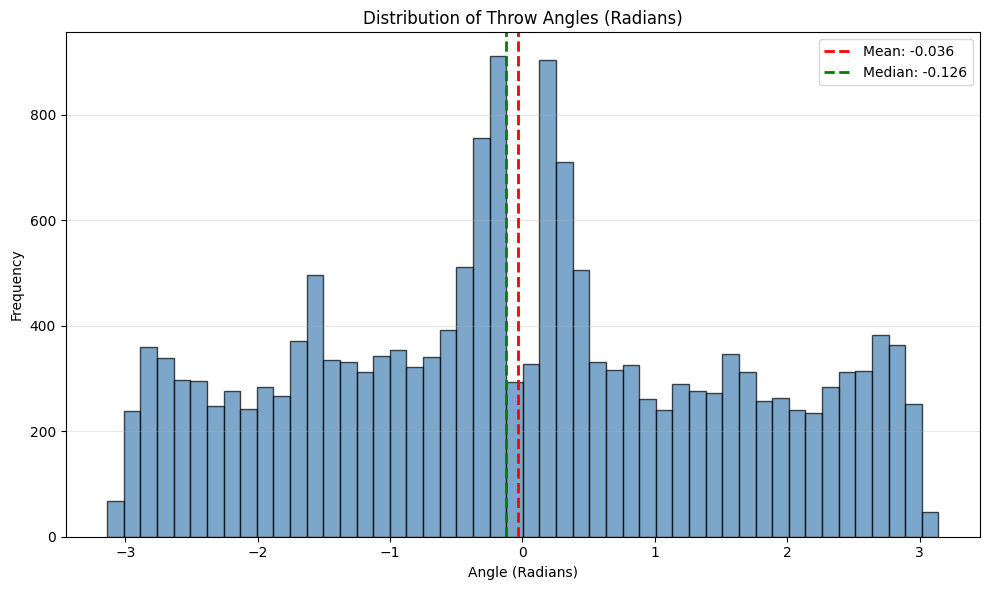


ANGLE (RADIANS) STATISTICS:
Count: 17,357
Mean: -0.035855
Median: -0.125996
Std Dev: 1.610967
Min: -3.136542
Max: 3.141593
Q1 (25%): -1.299318
Q3 (75%): 1.176928


In [131]:
# Distribution histogram of Angle (Radians)
plt.figure(figsize=(10, 6))

plt.hist(Throws['Angle (Radians)'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Angle (Radians)')
plt.ylabel('Frequency')
plt.title('Distribution of Throw Angles (Radians)')
plt.grid(axis='y', alpha=0.3)

# Add statistics
angle_rad = Throws['Angle (Radians)'].dropna()
plt.axvline(angle_rad.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {angle_rad.mean():.3f}')
plt.axvline(angle_rad.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {angle_rad.median():.3f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("ANGLE (RADIANS) STATISTICS:")
print(f"{'='*70}")
print(f"Count: {len(angle_rad):,}")
print(f"Mean: {angle_rad.mean():.6f}")
print(f"Median: {angle_rad.median():.6f}")
print(f"Std Dev: {angle_rad.std():.6f}")
print(f"Min: {angle_rad.min():.6f}")
print(f"Max: {angle_rad.max():.6f}")
print(f"Q1 (25%): {angle_rad.quantile(0.25):.6f}")
print(f"Q3 (75%): {angle_rad.quantile(0.75):.6f}")

In [133]:
# Create bin_angle based on Location and End_Location
# Classification based on throw direction from start to end location:
# Safe: throws directed toward X=0 (own goal/defensive)
# Aggressive: throws directed toward X=120 (opponent goal/attacking)
# Neutral: throws roughly perpendicular to the baselines (X direction change is minimal)
def _bin_angle_location(row):
    try:
        start_x = row.get('Location_X', None)
        start_y = row.get('Location_Y', None)
        end_x = row.get('End_Location_X', None)
        end_y = row.get('End_Location_Y', None)
        
        # If any value is missing, return None
        if pd.isna(start_x) or pd.isna(start_y) or pd.isna(end_x) or pd.isna(end_y):
            return None
        
        start_x = float(start_x)
        start_y = float(start_y)
        end_x = float(end_x)
        end_y = float(end_y)
        
        # Calculate change in X (direction toward baselines)
        delta_x = end_x - start_x
        
        # Calculate change in Y (direction perpendicular to baselines)
        delta_y = abs(end_y - start_y)
        
        # Define neutral as roughly perpendicular to baselines
        # If |delta_x| is small relative to |delta_y|, throw is perpendicular
        # Using threshold: if |delta_x| <= 5, consider it neutral (perpendicular)
        if abs(delta_x) <= 5:
            return 'Neutral'
        
        # Classify by direction of X movement
        if delta_x > 5:
            # Positive X change = toward X=120 (opponent goal, attacking)
            return 'Aggressive'
        else:  # delta_x < -5
            # Negative X change = toward X=0 (own goal, defensive)
            return 'Safe'
    
    except Exception:
        return None

# Apply the binning function to create bin_angle_3
Throws['bin_angle'] = Throws.apply(_bin_angle_location, axis=1)

# Display value counts and sample
print('bin_angle value counts:')
print(Throws['bin_angle'].value_counts(dropna=False))
print('\nSample of Location_X, Location_Y, End_Location_X, End_Location_Y, bin_angle:')
display(Throws[['Location_X', 'Location_Y', 'End_Location_X', 'End_Location_Y', 'bin_angle']].head(20))


bin_angle value counts:
bin_angle
Aggressive    8303
Safe          4868
Neutral       4186
Name: count, dtype: int64

Sample of Location_X, Location_Y, End_Location_X, End_Location_Y, bin_angle:


,Location_X,Location_Y,End_Location_X,End_Location_Y,bin_angle
0,92.6,0.1,96.3,13.5,Neutral
1,51.2,0.1,69.4,8.4,Aggressive
2,31.1,80.0,46.4,74.3,Aggressive
3,69.8,0.1,83.7,21.2,Aggressive
4,77.6,80.0,86.7,59.8,Aggressive
5,40.2,0.1,50.8,7.7,Aggressive
6,42.4,0.1,52.5,5.6,Aggressive
7,63.5,80.0,69.3,72.2,Aggressive
8,42.9,80.0,50.3,67.4,Aggressive
9,104.2,80.0,105.7,74.5,Neutral


In [136]:
# Define the new order of columns

Throws = Throws[['Match', 'Team', 'Location', 'Location_X', 'Location_Y', 'End_Location', 'End_Location_X', 'End_Location_Y',
                 'Angle (Radians)', 'Angle (Degrees)', 'Length', 'Duration', 'Time_to_Throw', 'Possession_Time', 'Third', 'bin_angle',
                 'High_Throw', 'Outcome']]
Throws.head(5)

,Match,Team,Location,Location_X,Location_Y,End_Location,End_Location_X,End_Location_Y,Angle (Radians),Angle (Degrees),Length,Duration,Time_to_Throw,Possession_Time,Third,bin_angle,High_Throw,Outcome
0,3753972,AFC Bournemouth,"[92.6, 0.1]",92.6,0.1,"[96.3, 13.5]",96.3,13.5,1.301390,74.564,13.901,1.512,13.486,17.401,Attacking Third,Neutral,High Pass,Successful
1,3753972,Swansea City,"[51.2, 0.1]",51.2,0.1,"[69.4, 8.4]",69.4,8.4,0.427869,24.515,20.003,1.590,22.138,0.000,Middle Third,Aggressive,Low Pass,Incomplete
2,3753972,AFC Bournemouth,"[31.1, 80.0]",31.1,80.0,"[46.4, 74.3]",46.4,74.3,-0.356620,-20.433,16.327,1.121,12.324,2.318,Defensive Third,Aggressive,High Pass,Successful
3,3753972,AFC Bournemouth,"[69.8, 0.1]",69.8,0.1,"[83.7, 21.2]",83.7,21.2,0.988282,56.624,25.267,2.210,17.509,19.325,Middle Third,Aggressive,Low Pass,Successful
4,3753972,AFC Bournemouth,"[77.6, 80.0]",77.6,80.0,"[86.7, 59.8]",86.7,59.8,-1.147531,-65.749,22.155,1.894,9.670,12.159,Middle Third,Aggressive,Low Pass,Successful


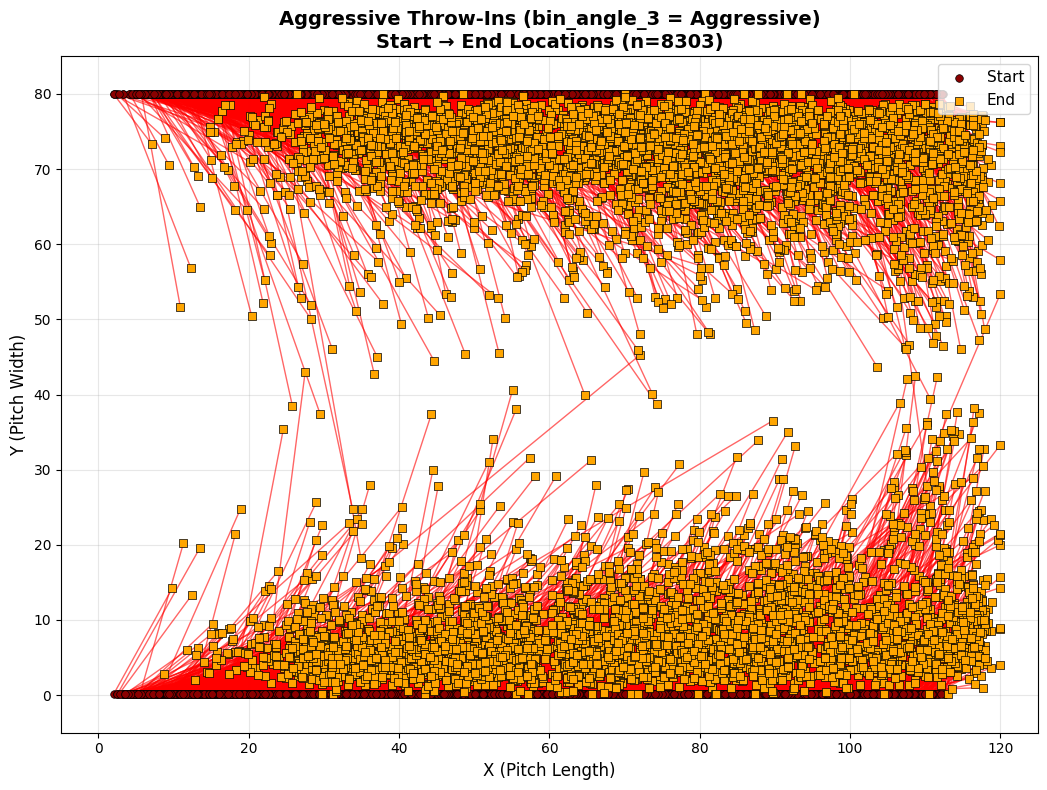


Total Aggressive throws plotted: 8303


In [113]:
# # Plot Aggressive throws from bin_angle_3
# # Filter for bin_angle_3 = Aggressive
# from matplotlib.collections import LineCollection

# aggressive_throws = Throws[Throws['bin_angle_3'] == 'Aggressive'].copy()
# aggressive_throws = aggressive_throws.dropna(subset=['Location_X','Location_Y','End_Location_X','End_Location_Y'])

# if aggressive_throws.empty:
#     print('No aggressive throws with complete coordinates available to plot.')
# else:
#     # Build line segments from start to end
#     segments = list(zip(aggressive_throws[['Location_X','Location_Y']].values.tolist(), 
#                         aggressive_throws[['End_Location_X','End_Location_Y']].values.tolist()))
#     lc = LineCollection(segments, colors='red', linewidths=1, alpha=0.6)

#     fig, ax = plt.subplots(figsize=(12, 8))
#     ax.add_collection(lc)
    
#     # Plot start points (circles)
#     ax.scatter(aggressive_throws['Location_X'], aggressive_throws['Location_Y'], 
#                c='darkred', s=30, edgecolor='black', linewidth=0.5, label='Start', marker='o', zorder=5)
    
#     # Plot end points (squares)
#     ax.scatter(aggressive_throws['End_Location_X'], aggressive_throws['End_Location_Y'], 
#                c='orange', s=30, edgecolor='black', linewidth=0.5, label='End', marker='s', zorder=5)

#     # Pitch bounds (StatsBomb coords: x in [0,120], y in [0,80])
#     ax.set_xlim(-5, 125)
#     ax.set_ylim(-5, 85)
#     ax.set_aspect('equal')
#     ax.set_xlabel('X (Pitch Length)', fontsize=12)
#     ax.set_ylabel('Y (Pitch Width)', fontsize=12)
#     ax.set_title(f'Aggressive Throw-Ins (bin_angle_3 = Aggressive)\nStart → End Locations (n={len(aggressive_throws)})', fontsize=14, fontweight='bold')
#     ax.legend(loc='upper right', fontsize=11)
#     ax.grid(True, alpha=0.3)
    
#     plt.tight_layout()
#     plt.show()
    
#     print(f"\nTotal Aggressive throws plotted: {len(aggressive_throws)}")


In [137]:
# Create possession_outcome: simple Successful vs Incomplete logic
# - If Outcome == 'Successful' -> 'Successful'
# - Else -> 'Incomplete'
Throws['Possession_outcome'] = np.where(Throws['Outcome'] == 'Successful', 'Successful', 'Incomplete')

# Numeric representations of Throws['Outcome']
# Binary: 1 = Successful, 0 = not successful
Throws['Outcome_Binary'] = np.where(Throws['Outcome'] == 'Successful', 1, 0)

In [138]:
# One-hot encode the Height column
# Delete any existing Height one-hot columns
height_cols_to_drop = [col for col in Throws.columns if col.startswith('Height_')]
if height_cols_to_drop:
    Throws = Throws.drop(columns=height_cols_to_drop)
    print(f'Deleted existing height columns: {height_cols_to_drop}')
# Fill missing heights with a sentinel 'Unknown' so get_dummies creates a column for it
Throws['Height'] = Throws['High_Throw'].fillna('Unknown')
height_dummies = pd.get_dummies(Throws['High_Throw'], prefix='Height')

# Concatenate the one-hot columns onto the Throws dataframedisplay(Throws[ ['High_Throw'] + list(height_dummies.columns) ].head())

Throws = pd.concat([Throws, height_dummies], axis=1)
print('Created height one-hot columns:', list(height_dummies.columns))
# Show which dummy columns were created and a quick sample

Created height one-hot columns: ['Height_High Pass', 'Height_Low Pass']


In [139]:
# One-hot encode the Third column
# Delete any existing Third one-hot columns
third_cols_to_drop = [col for col in Throws.columns if col in ['Attacking Third', 'Defensive Third', 'Middle Third', 'Unknown']]
if third_cols_to_drop:
    Throws = Throws.drop(columns=third_cols_to_drop)
    print(f'Deleted existing third columns: {third_cols_to_drop}')
# Fill missing Thirds with a sentinel 'Unknown' so get_dummies creates a column for it
Throws['Third'] = Throws['Third'].fillna('Unknown')
third_dummies = pd.get_dummies(Throws['Third'])

# Concatenate the one-hot columns onto the Throws dataframedisplay(Throws[ ['Third'] + list(third_dummies.columns) ].head())

Throws = pd.concat([Throws, third_dummies], axis=1)
print('Created third one-hot columns:', list(third_dummies.columns))
# Show which dummy columns were created and a quick sample

Created third one-hot columns: ['Attacking Third', 'Defensive Third', 'Middle Third']


In [159]:
# Bin throw lengths into Long and Short throws based on 50th percentile
length_median = Throws['Length'].median()

print(f"Length median (50th percentile): {length_median:.3f}")
print(f"\nLength statistics:")
print(Throws['Length'].describe())

# Create Length_Bin column: 'Short' if <= median, 'Long' if > median
Throws['Length_Bin'] = Throws['Length'].apply(lambda x: 'Short' if x <= length_median else 'Long')

# Display value counts and sample
print(f"\nLength_Bin distribution:")
print(Throws['Length_Bin'].value_counts())

Length median (50th percentile): 16.729

Length statistics:
count    17357.000000
mean        18.357994
std          8.762022
min          0.000000
25%         11.511000
50%         16.729000
75%         23.673000
max        108.161000
Name: Length, dtype: float64

Length_Bin distribution:
Length_Bin
Short    8680
Long     8677
Name: count, dtype: int64


In [162]:
# Create Length_Bin Column: 'Short' if <= median, 'Long' if > median
Throws['Length_Bin'] = np.where(Throws['Length'] > length_median, 'Long', 'Short')
# Display value counts
print(Throws['Length_Bin'].value_counts())

Length_Bin
Short    8680
Long     8677
Name: count, dtype: int64


In [142]:
# Average Angle values within each bin_angle
angle_bin_stats = Throws.groupby('bin_angle')['Angle (Radians)'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index()
angle_bin_stats.columns = ['bin_angle', 'Avg_Angle', 'Min_Angle', 'Max_Angle', 'Std_Dev', 'Count']

print("Average Angle by bin_angle:")
print(angle_bin_stats.to_string(index=False))
print("\n" + "="*70)

Average Angle by bin_angle:
 bin_angle  Avg_Angle  Min_Angle  Max_Angle  Std_Dev  Count
Aggressive  -0.031810  -1.434780   1.446150 0.600952   8303
   Neutral  -0.132919  -2.984991   3.141593 1.598013   4186
      Safe   0.040710  -3.136542   3.141593 2.535518   4868



## Games df for xRetain

In [ ]:
# Average Angle values within each bin_angle
    PremierLeague[['match_id', 'home_team', 'away_team', 'home_score', 'away_score']]
    .sort_values(by='match_id',ascending=True)
    .reset_index(drop=True)
)
Games.head()

print("\n" + "="*70)print(angle_bin_stats.to_string(index=False))print("Average Angle by bin_angle:")angle_bin_stats.columns = ['bin_angle', 'Avg_Angle', 'Min_Angle', 'Max_Angle', 'Std_Dev', 'Count']angle_bin_stats = Throws.groupby('bin_angle')['Angle'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index()angle_bin_stats = Throws.groupby('bin_angle')['Angle'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index()
angle_bin_stats.columns = ['bin_angle', 'Avg_Angle', 'Min_Angle', 'Max_Angle', 'Std_Dev', 'Count']

print("Average Angle by bin_angle:")
print(angle_bin_stats.to_string(index=False))
print("\n" + "="*70)# Average Angle values within each bin_angle






print("\n" + "="*70)print(angle_bin_stats.to_string(index=False))print("Average Angle by bin_angle:")angle_bin_stats.columns = ['bin_angle', 'Avg_Angle', 'Min_Angle', 'Max_Angle', 'Std_Dev', 'Count']angle_bin_stats = Throws.groupby('bin_angle')['Angle'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index()





print("\n" + "="*70)print(angle_bin_stats.to_string(index=False))print("Average Angle by bin_angle:")angle_bin_stats.columns = ['bin_angle', 'Avg_Angle', 'Min_Angle', 'Max_Angle', 'Std_Dev', 'Count']angle_bin_stats = Throws.groupby('bin_angle')['Angle'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index()    PremierLeague[['match_id', 'home_team', 'away_team', 'home_score', 'away_score']]
    .sort_values(by='match_id',ascending=True)
    .reset_index(drop=True)
)

)
Games.head()





print("\n" + "="*70)print(angle_bin_stats.to_string(index=False))print("Average Angle by bin_angle:")angle_bin_stats.columns = ['bin_angle', 'Avg_Angle', 'Min_Angle', 'Max_Angle', 'Std_Dev', 'Count']angle_bin_stats = Throws.groupby('bin_angle')['Angle'].agg(['mean', 'min', 'max', 'std', 'count']).reset_index()    PremierLeague[['match_id', 'home_team', 'away_team', 'home_score', 'away_score']]
    .sort_values(by='match_id',ascending=True)
    .reset_index(drop=True)
)
Games.head()bin_stats.to_string(index=False))
print("\n" + "="*70)Games = (
    PremierLeague[['match_id', 'home_team', 'away_team', 'home_score', 'away_score']]
    .sort_values(by='match_id',ascending=True)
    .reset_index(drop=True)
)
Games.head()

,match_id,home_team,away_team,home_score,away_score
0,3753972,Swansea City,AFC Bournemouth,2,2
1,3753973,Chelsea,West Ham United,2,2
2,3753974,Newcastle United,Everton,0,1
3,3753975,Sunderland,AFC Bournemouth,1,1
4,3753976,Arsenal,Swansea City,1,2


In [74]:
# Create one col to determine outcome for home team: Win, Lose, or Draw
Games['home_outcome'] = np.select(
    (Games['home_score'] > Games['away_score'],Games['home_score'] < Games['away_score'],Games['home_score'] == Games['away_score']),
    ('Win','Lose','Draw'),
    default='Other'
)

In [75]:
# Create one col to determine outcome for away team: Win, Lose, or Draw
Games['away_outcome'] = np.select(
    (Games['away_score'] > Games['home_score'],Games['away_score'] < Games['home_score'],Games['away_score'] == Games['home_score']),
    ('Win','Lose','Draw'),
    default='Other'
)

In [76]:
# Home df
home_df = Games[['match_id', 'home_team', 'home_outcome']].copy()
home_df.rename(columns={'home_team': 'Team', 'home_outcome': 'Outcome', 'match_id': 'Match'}, inplace=True)

# Away df
away_df = Games[['match_id', 'away_team', 'away_outcome']].copy()
away_df.rename(columns={'away_team': 'Team', 'away_outcome': 'Outcome', 'match_id': 'Match'}, inplace=True)

In [77]:
# Combine both dataframes into new
Games = pd.concat([home_df, away_df], ignore_index=True).sort_values(by=['Match', 'Team']).reset_index(drop=True)

In [78]:
# Count number of throw-ins per game per team
throw_counts = Throws.groupby(['Match', 'Team']).size().reset_index(name='Total_Throws')
Games = Games.merge(throw_counts, on=['Match', 'Team'], how='left')

In [79]:
# Loop to compute throw-ins lasting over 1 to 15 seconds
for sec in range(1, 16):
    col_count = f'{sec}sec_Count'
    col_pct = f'{sec}sec_%'
    
    stats = (
        Throws.groupby(['Match', 'Team'])
        .agg(
            Throws_Count=('Angle', 'count'),
            **{col_count: ('Possession_Time', lambda x, s=sec: (x > s).sum())}  # throws lasting > sec
        )
        .reset_index()
    )
    
    stats[col_pct] = (stats[col_count] / stats['Throws_Count'] * 100).round(3)
    
    # Merge into Games dataframe
    Games = Games.merge(stats[['Match', 'Team', col_count, col_pct]], on=['Match', 'Team'], how='left')

In [80]:
Games.head(10)

,Match,Team,Outcome,Total_Throws,1sec_Count,1sec_%,2sec_Count,2sec_%,3sec_Count,3sec_%,4sec_Count,4sec_%,5sec_Count,5sec_%,6sec_Count,6sec_%,7sec_Count,7sec_%,8sec_Count,8sec_%,9sec_Count,9sec_%,10sec_Count,10sec_%,11sec_Count,11sec_%,12sec_Count,12sec_%,13sec_Count,13sec_%,14sec_Count,14sec_%,15sec_Count,15sec_%
0,3753972,AFC Bournemouth,Draw,25,24,96.000,23,92.000,22,88.000,22,88.000,22,88.000,21,84.000,20,80.000,19,76.000,17,68.000,16,64.000,15,60.000,13,52.000,11,44.000,10,40.000,10,40.000
1,3753972,Swansea City,Draw,25,18,72.000,18,72.000,17,68.000,16,64.000,14,56.000,13,52.000,12,48.000,11,44.000,11,44.000,11,44.000,11,44.000,11,44.000,10,40.000,10,40.000,8,32.000
2,3753973,Chelsea,Draw,20,14,70.000,14,70.000,13,65.000,11,55.000,11,55.000,11,55.000,11,55.000,10,50.000,10,50.000,8,40.000,8,40.000,8,40.000,8,40.000,8,40.000,8,40.000
3,3753973,West Ham United,Draw,8,4,50.000,4,50.000,4,50.000,4,50.000,3,37.500,3,37.500,3,37.500,3,37.500,1,12.500,1,12.500,1,12.500,1,12.500,1,12.500,1,12.500,1,12.500
4,3753974,Everton,Win,11,11,100.000,11,100.000,10,90.909,10,90.909,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727,8,72.727
5,3753974,Newcastle United,Lose,15,13,86.667,12,80.000,11,73.333,9,60.000,9,60.000,9,60.000,8,53.333,8,53.333,8,53.333,7,46.667,7,46.667,7,46.667,7,46.667,7,46.667,7,46.667
6,3753975,AFC Bournemouth,Draw,28,27,96.429,26,92.857,26,92.857,26,92.857,25,89.286,23,82.143,23,82.143,23,82.143,23,82.143,22,78.571,22,78.571,22,78.571,22,78.571,21,75.000,20,71.429
7,3753975,Sunderland,Draw,23,20,86.957,20,86.957,19,82.609,19,82.609,17,73.913,17,73.913,16,69.565,15,65.217,15,65.217,15,65.217,12,52.174,12,52.174,12,52.174,9,39.130,8,34.783
8,3753976,Arsenal,Lose,22,22,100.000,22,100.000,22,100.000,20,90.909,20,90.909,18,81.818,18,81.818,18,81.818,18,81.818,18,81.818,17,77.273,16,72.727,16,72.727,15,68.182,15,68.182
9,3753976,Swansea City,Win,16,9,56.250,9,56.250,9,56.250,7,43.750,6,37.500,6,37.500,5,31.250,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000,4,25.000


### Plotting for Games df

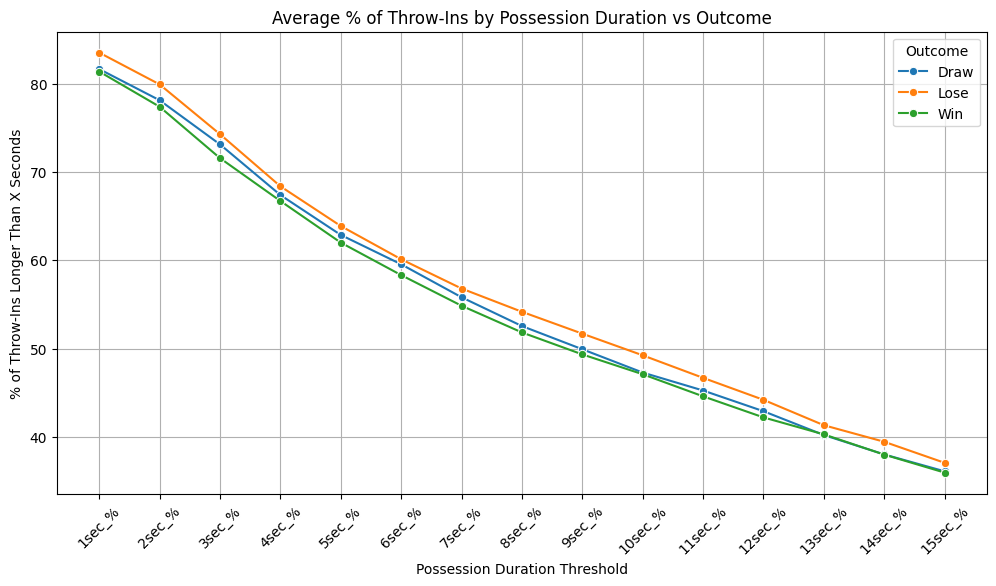

In [81]:
# Filter only the % columns
percent_cols = [f'{i}sec_%' for i in range(1, 16)]

# Aggregate by Outcome
agg_df = Games.groupby('Outcome')[percent_cols].mean().reset_index()

# Melt for plotting
plot_df = agg_df.melt(id_vars='Outcome', var_name='Seconds', value_name='Percentage')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=plot_df, x='Seconds', y='Percentage', hue='Outcome', marker='o')
plt.xticks(rotation=45)
plt.title('Average % of Throw-Ins by Possession Duration vs Outcome')
plt.ylabel('% of Throw-Ins Longer Than X Seconds')
plt.xlabel('Possession Duration Threshold')
plt.grid(True)
plt.show()


## Prepare Data for Tree Modeling
### Throw Complete/Incomplete Model

In [61]:
Throws.head(10)

,Match,Team,Location,Location_X,Location_Y,End_Location,End_Location_X,End_Location_Y,Angle,Length,Duration,Time_to_Throw,Possession_Time,Third,bin_angle,High_Throw,Outcome,Possession_outcome,Outcome_Binary,Height,Height_High Pass,Height_Low Pass,Attacking Third,Defensive Third,Middle Third
0,3753972,AFC Bournemouth,"[92.6, 0.1]",92.6,0.1,"[96.3, 13.5]",96.3,13.5,74.564,13.901,1.512,13.486,17.401,Attacking Third,Safe,High Pass,Successful,Successful,1,High Pass,True,False,True,False,False
1,3753972,Swansea City,"[51.2, 0.1]",51.2,0.1,"[69.4, 8.4]",69.4,8.4,24.515,20.003,1.590,22.138,0.000,Middle Third,Neutral,Low Pass,Incomplete,Incomplete,0,Low Pass,False,True,False,False,True
2,3753972,AFC Bournemouth,"[31.1, 80.0]",31.1,80.0,"[46.4, 74.3]",46.4,74.3,-20.433,16.327,1.121,12.324,2.318,Defensive Third,Neutral,High Pass,Successful,Successful,1,High Pass,True,False,False,True,False
3,3753972,AFC Bournemouth,"[69.8, 0.1]",69.8,0.1,"[83.7, 21.2]",83.7,21.2,56.624,25.267,2.210,17.509,19.325,Middle Third,Safe,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True
4,3753972,AFC Bournemouth,"[77.6, 80.0]",77.6,80.0,"[86.7, 59.8]",86.7,59.8,-65.749,22.155,1.894,9.670,12.159,Middle Third,Safe,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True
5,3753972,AFC Bournemouth,"[40.2, 0.1]",40.2,0.1,"[50.8, 7.7]",50.8,7.7,35.640,13.043,1.018,17.790,1.931,Middle Third,Safe,High Pass,Successful,Successful,1,High Pass,True,False,False,False,True
6,3753972,AFC Bournemouth,"[42.4, 0.1]",42.4,0.1,"[52.5, 5.6]",52.5,5.6,28.571,11.500,1.013,16.157,6.796,Middle Third,Neutral,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True
7,3753972,Swansea City,"[63.5, 80.0]",63.5,80.0,"[69.3, 72.2]",69.3,72.2,-53.366,9.720,1.023,15.200,43.468,Middle Third,Safe,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True
8,3753972,AFC Bournemouth,"[42.9, 80.0]",42.9,80.0,"[50.3, 67.4]",50.3,67.4,-59.574,14.612,0.886,9.436,9.651,Middle Third,Safe,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True
9,3753972,Swansea City,"[104.2, 80.0]",104.2,80.0,"[105.7, 74.5]",105.7,74.5,-74.745,5.701,0.853,14.724,0.000,Attacking Third,Safe,Low Pass,Incomplete,Incomplete,0,Low Pass,False,True,True,False,False


In [26]:
Throws.describe(include='all')

,Match,Team,Location,Location_X,Location_Y,End_Location,End_Location_X,End_Location_Y,Angle,Length,Duration,Time_to_Throw,Possession_Time,Third,bin_angle,High_Throw,Outcome,Possession_outcome,Outcome_Binary,Height,Pass_Height_High Pass,Pass_Height_Low Pass,Attacking Third,Defensive Third,Middle Third,Attacking Third,Defensive Third,Middle Third
count,1.735700e+04,17357,17357,17357.000000,17357.000000,17357,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357.000000,17357,17357,17357,17357,17357,17357.000000,17357,17357,17357,17357,17357,17357,17357,17357,17357
unique,NaN,20,2271,NaN,NaN,16834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,2,3,2,NaN,2,2,2,2,2,2,2,2,2
top,NaN,AFC Bournemouth,"[67.2, 80.0]",NaN,NaN,"[62.6, 12.4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle Third,Safe,Low Pass,Successful,Successful,NaN,Low Pass,False,True,False,False,False,False,False,False
freq,NaN,1024,25,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7108,12292,10980,14316,14316,NaN,10980,10980,10980,10937,13528,10249,10937,13528,10249
mean,3.754162e+06,NaN,NaN,66.508613,41.410284,NaN,70.732258,40.921219,-2.054359,18.357994,1.528968,18.464488,23.018298,NaN,NaN,NaN,NaN,NaN,0.824797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.101887e+02,NaN,NaN,29.604994,39.927985,NaN,27.698559,30.621759,92.301607,8.762022,0.752241,13.772545,145.644030,NaN,NaN,NaN,NaN,NaN,0.380152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.753972e+06,NaN,NaN,2.000000,0.100000,NaN,1.200000,0.100000,-179.711000,0.000000,0.007000,0.133000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.754066e+06,NaN,NaN,43.000000,0.100000,NaN,49.000000,8.500000,-74.445000,11.511000,1.002000,11.056000,2.673000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.754163e+06,NaN,NaN,67.900000,80.000000,NaN,72.300000,52.800000,-7.219000,16.729000,1.403000,15.883000,9.175000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.754258e+06,NaN,NaN,91.600000,80.000000,NaN,93.300000,71.500000,67.433000,23.673000,1.852000,21.789000,21.823000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Throws['Outcome'].unique()

array(['Successful', 'Incomplete', 'Out'], dtype=object)

In [143]:
Features = ['Angle (Radians)', 'Duration', 'Height_High Pass', 'Height_Low Pass', 'Length', 'Location_X', 'Location_Y', 'End_Location_X', 'End_Location_Y', 'Time_to_Throw']

In [40]:
y = Throws['Outcome_Binary']
x = Throws[Features]

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=.3, random_state = 0)

## Decision Tree Model

In [149]:
from sklearn import tree
from sklearn.tree import export_text

dtree = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=30)
dtree.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,30
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [150]:
r = export_text(dtree, feature_names=list(x_train.columns))
print(r)

|--- Height_Low Pass <= 0.50
|   |--- Angle <= 94.57
|   |   |--- Length <= 20.94
|   |   |   |--- Angle <= 38.70
|   |   |   |   |--- Duration <= 1.58
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Duration >  1.58
|   |   |   |   |   |--- class: 1
|   |   |   |--- Angle >  38.70
|   |   |   |   |--- Length <= 4.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Length >  4.33
|   |   |   |   |   |--- class: 1
|   |   |--- Length >  20.94
|   |   |   |--- Length <= 26.58
|   |   |   |   |--- Angle <= 27.94
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Angle >  27.94
|   |   |   |   |   |--- class: 1
|   |   |   |--- Length >  26.58
|   |   |   |   |--- Duration <= 2.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Duration >  2.80
|   |   |   |   |   |--- class: 0
|   |--- Angle >  94.57
|   |   |--- End_Location_X <= 107.10
|   |   |   |--- Length <= 3.75
|   |   |   |   |--- class: 0
|   |   |   |--- Length >  3.75
|   |   |   |   |--- Duration <= 6.

In [151]:
from sklearn.metrics import confusion_matrix
prediction = dtree.predict(x_val)
cm = confusion_matrix(y_val, prediction)
cm

array([[ 507,  429],
       [ 400, 3872]])

In [152]:
dtree.score(x_val, y_val)

0.8408218125960062

<Axes: >

<Axes: >

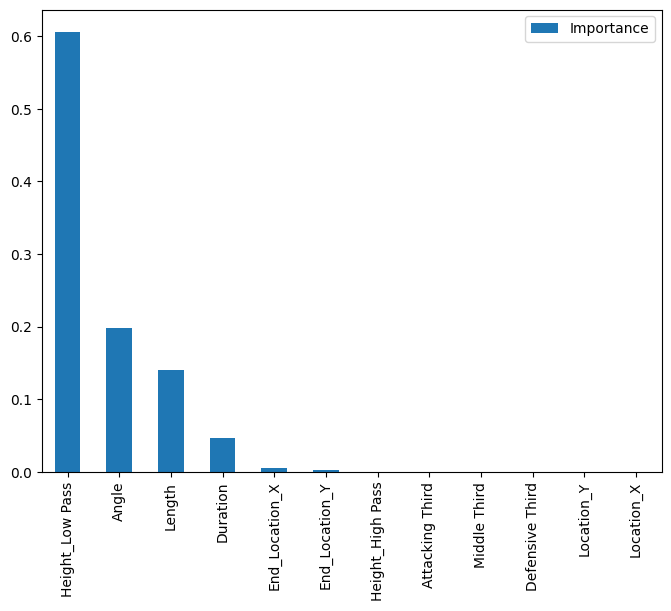

In [154]:
importances = dtree.feature_importances_

import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(importances, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Random Forest Model

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
from sklearn.model_selection import GridSearchCV
param = {
    'n_estimators': [50,100],
    'max_features': range(1,18)
}

In [159]:
#Grid Search of Hyperparameters
rf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(estimator=rf, param_grid = param, n_jobs=-1)
grid.fit(x_train, y_train)

,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_features': range(1, 18), 'n_estimators': [50, 100]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [160]:
grid.best_params_

{'max_features': 7, 'n_estimators': 50}

In [161]:
#Score Model on Validation Data
grid.score(x_val, y_val)

0.837173579109063

In [162]:
final_model = grid.best_estimator_

In [164]:
# Feature Importance of Final Model
feature_imp = pd.Series(final_model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_imp

Angle               0.189542
Length              0.156125
Duration            0.147049
End_Location_X      0.110058
Height_Low Pass     0.099855
Location_X          0.099548
End_Location_Y      0.097531
Height_High Pass    0.085833
Location_Y          0.005516
Middle Third        0.004403
Attacking Third     0.002362
Defensive Third     0.002178
dtype: float64

<Axes: >

<Axes: >

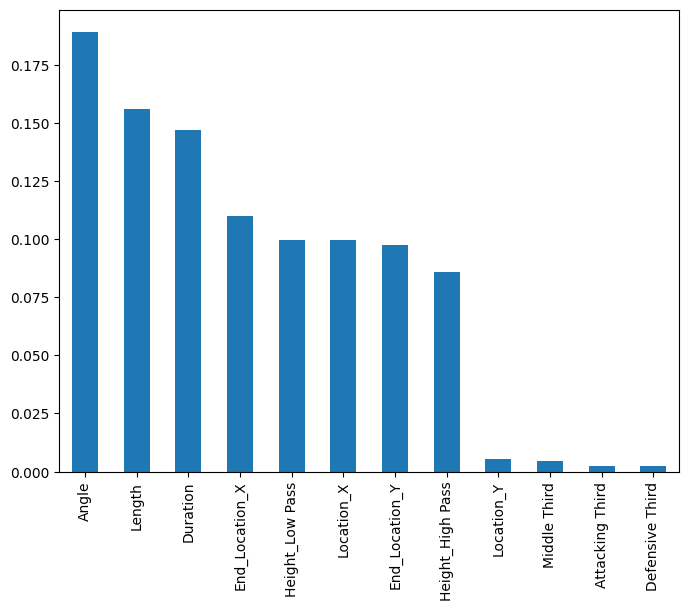

In [165]:
feature_imp.plot(kind='bar', figsize=(8,6))

## Regression Model

In [167]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 646.6 kB/s eta 0:00:15
   -- ------------------------------------- 0.5/9.6 MB 646.6 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.6 MB 618.2 kB/s eta 0:00:15
   --- ------------------------------------ 0.8/9.6 MB 618.2 kB/s eta 0:00:15
   ---- ----------------------------------- 1.0/9.6 MB 560.1 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.6 MB 560.1 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.6 MB 560.1 kB/s eta 0:00:16
   ----- ---------------------------------- 1.3/9.6 MB 556.8 kB/s eta 0:00:15
   ----- ----------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
# Prepare a copy of Throws for logistic regression and convert boolean-like columns to binary
Throws_logreg = Throws.copy()
# Convert native bool dtypes
bool_cols = Throws_logreg.select_dtypes(include=['bool']).columns.tolist()
for c in bool_cols:
    Throws_logreg[c] = Throws_logreg[c].astype(int)
# Convert pandas nullable boolean dtype 'boolean' if present
nullable_bool_cols = [c for c in Throws_logreg.columns if str(Throws_logreg[c].dtype) == 'boolean']
for c in nullable_bool_cols:
    # Fill NA with 0 then cast to int
    Throws_logreg[c] = Throws_logreg[c].astype('Int64').fillna(0).astype(int)
# Convert object columns that are 'True'/'False' strings to 1/0
for c in Throws_logreg.select_dtypes(include=['object']).columns:
    vals = set(map(lambda x: str(x), Throws_logreg[c].dropna().unique()))
    if vals <= {'True','False'}:
        Throws_logreg[c] = Throws_logreg[c].map({'True':1,'False':0})
# If you have other boolean-like columns stored as ints or categories, they are left as-is
# Prepare X/y for logistic regression using the existing Features list (must be defined earlier)
X_lr = Throws_logreg[Features].copy()
y_lr = Throws_logreg['Outcome_Binary']


In [188]:
from sklearn.model_selection import train_test_split
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
print('Prepared Throws_logreg and X/y splits for logistic regression')
print('Converted boolean columns:', bool_cols + nullable_bool_cols)
X_train_lr.head()

Prepared Throws_logreg and X/y splits for logistic regression
Converted boolean columns: ['Height_High Pass', 'Height_Low Pass', 'Attacking Third', 'Defensive Third', 'Middle Third']


Prepared Throws_logreg and X/y splits for logistic regression
Converted boolean columns: ['Height_High Pass', 'Height_Low Pass', 'Attacking Third', 'Defensive Third', 'Middle Third']


,Angle,Duration,Height_High Pass,Height_Low Pass,Length,Attacking Third,Defensive Third,Middle Third,Location_X,Location_Y,End_Location_X,End_Location_Y
1259,96.096,1.063,0,1,10.359,1,0,0,93.9,0.1,92.8,10.4
1611,101.368,1.863,0,1,19.278,0,0,1,68.0,80.0,64.2,61.1
2983,79.888,1.271,0,1,15.948,0,0,1,71.4,0.1,74.2,15.8
2046,74.982,0.779,0,1,12.735,0,0,1,74.5,80.0,77.8,67.7
8582,36.057,1.031,0,1,14.101,0,0,1,40.1,80.0,51.5,71.7


array([[<Axes: title={'center': 'Angle'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Height_High Pass'}>],
       [<Axes: title={'center': 'Height_Low Pass'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Attacking Third'}>],
       [<Axes: title={'center': 'Defensive Third'}>,
        <Axes: title={'center': 'Middle Third'}>,
        <Axes: title={'center': 'Location_X'}>],
       [<Axes: title={'center': 'Location_Y'}>,
        <Axes: title={'center': 'End_Location_X'}>,
        <Axes: title={'center': 'End_Location_Y'}>]], dtype=object)

array([[<Axes: title={'center': 'Angle'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Height_High Pass'}>],
       [<Axes: title={'center': 'Height_Low Pass'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Attacking Third'}>],
       [<Axes: title={'center': 'Defensive Third'}>,
        <Axes: title={'center': 'Middle Third'}>,
        <Axes: title={'center': 'Location_X'}>],
       [<Axes: title={'center': 'Location_Y'}>,
        <Axes: title={'center': 'End_Location_X'}>,
        <Axes: title={'center': 'End_Location_Y'}>]], dtype=object)

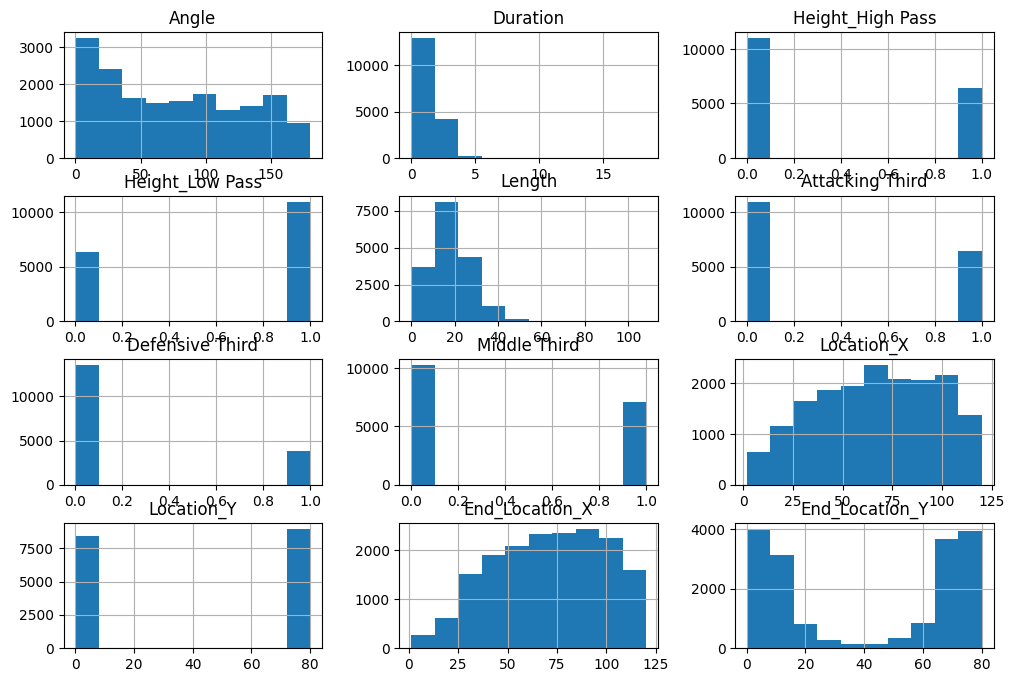

In [193]:
X_lr.hist(figsize=(12,8))

In [41]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------------- ------------------------- 3.4/9.6 MB 18.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 17.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 17.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [190]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train_lr, X_train_lr).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.309916
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Outcome_Binary   No. Observations:                12149
Model:                          Logit   Df Residuals:                    12138
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 Oct 2025   Pseudo R-squ.:                  0.3278
Time:                        16:47:07   Log-Likelihood:                -3765.2
converged:                       True   LL-Null:                       -5601.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Angle                0.0164      0.002      7.560      0.000       0.012       0.021
Duration   

## Plotting Throw Ins

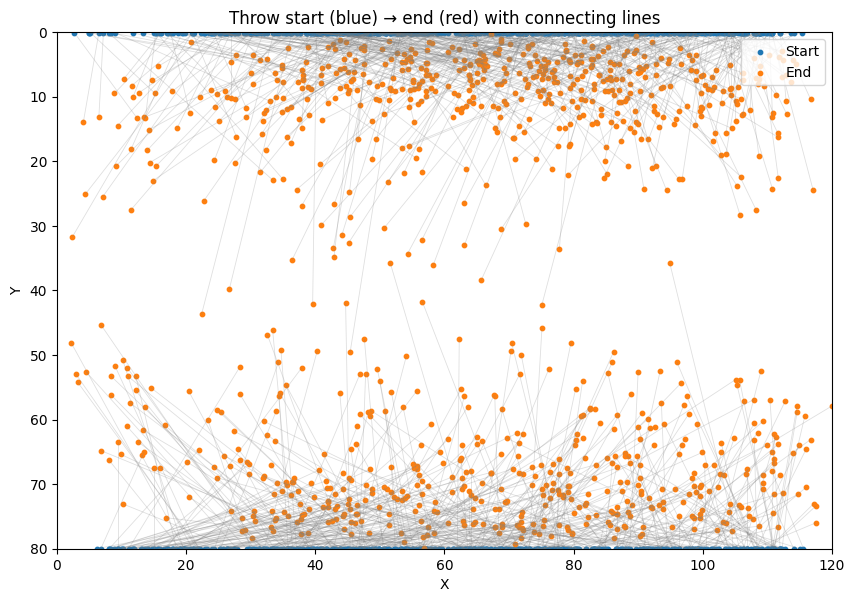

In [197]:
# Plot all throw start -> end locations and connect them with lines
# Filters rows with missing coordinates and plots starts (blue), ends (red), and connecting gray lines
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Select rows with complete coordinates
plot_df = Throws[Throws['Team'] == 'Tottenham Hotspur'].copy()
plot_df = plot_df.dropna(subset=['Location_X','Location_Y','End_Location_X','End_Location_Y'])
if plot_df.empty:
    print('No complete Location/End_Location coordinate pairs available to plot.')
else:
    # Build line segments for faster plotting
    segments = list(zip(plot_df[['Location_X','Location_Y']].values.tolist(), plot_df[['End_Location_X','End_Location_Y']].values.tolist()))
    lc = LineCollection(segments, colors='gray', linewidths=0.6, alpha=0.25)

    plt.figure(figsize=(10,7))
    ax = plt.gca()
    ax.add_collection(lc)
    # Plot start and end points
    ax.scatter(plot_df['Location_X'], plot_df['Location_Y'], c='C0', s=10, label='Start')
    ax.scatter(plot_df['End_Location_X'], plot_df['End_Location_Y'], c='C1', s=10, label='End')

    # Pitch bounds (StatsBomb coords: x in [0,120], y in [0,80]) - adjust if needed
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Throw start (blue) → end (red) with connecting lines')
    ax.legend(loc='upper right')
    plt.gca().invert_yaxis()  # optional: flip y so plots look like pitch (top-down) — remove if not desired
    plt.show()

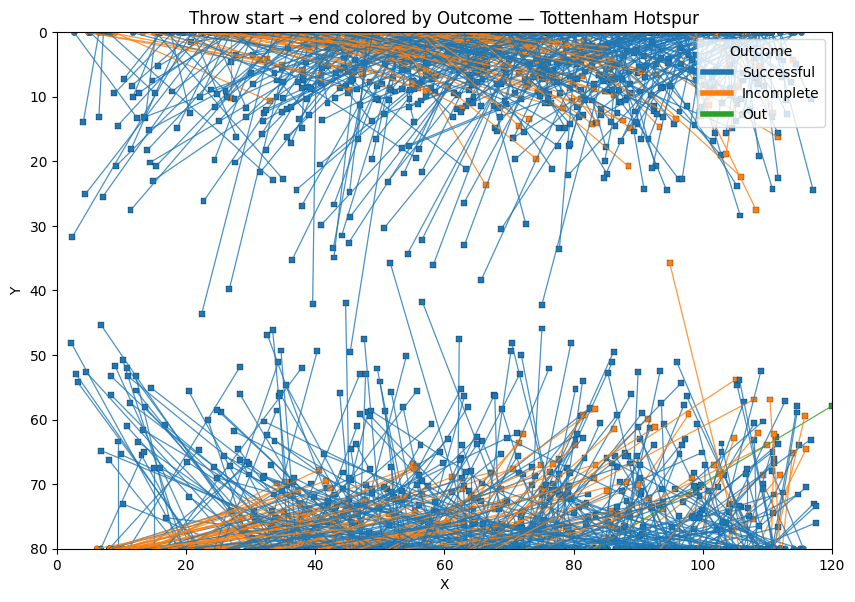

In [198]:
# Plot all throw start -> end locations for Tottenham Hotspur and color by Outcome
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D
import seaborn as sns

team = 'Tottenham Hotspur'
# Select rows with complete coordinates and filter by team (case-insensitive)
plot_df = Throws.dropna(subset=['Location_X','Location_Y','End_Location_X','End_Location_Y']).copy()
if team is not None:
    plot_df = plot_df[plot_df['Team'].astype(str).str.strip().str.lower() == team.lower()]

if plot_df.empty:
    print(f'No complete Location/End_Location coordinate pairs available to plot for team: {team}')
else:
    # Build line segments (start -> end)
    segments = list(zip(plot_df[['Location_X','Location_Y']].values.tolist(), plot_df[['End_Location_X','End_Location_Y']].values.tolist()))

    # Map Outcomes to colors using a categorical palette
    outcomes = plot_df['Outcome'].astype(str)
    outcomes_unique = list(dict.fromkeys(outcomes.tolist()))  # preserve order of appearance
    palette = sns.color_palette('tab10', n_colors=max(3, len(outcomes_unique)))
    outcome_color_map = {o: palette[i % len(palette)] for i, o in enumerate(outcomes_unique)}
    segment_colors = [outcome_color_map[o] for o in outcomes.tolist()]

    # Create LineCollection with per-segment colors
    lc = LineCollection(segments, colors=segment_colors, linewidths=0.9, alpha=0.8)

    plt.figure(figsize=(10,7))
    ax = plt.gca()
    ax.add_collection(lc)

    # Plot start and end points colored by outcome
    start_colors = [outcome_color_map[o] for o in outcomes.tolist()]
    end_colors = [outcome_color_map[o] for o in outcomes.tolist()]
    ax.scatter(plot_df['Location_X'], plot_df['Location_Y'], c=start_colors, s=18, edgecolor='k', linewidth=0.2, label='Start')
    ax.scatter(plot_df['End_Location_X'], plot_df['End_Location_Y'], c=end_colors, s=18, edgecolor='k', linewidth=0.2, marker='s', label='End')

    # Pitch bounds (StatsBomb coords: x in [0,120], y in [0,80])
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Throw start → end colored by Outcome — {team}')

    # Build legend for Outcome categories
    handles = [Line2D([0],[0], color=outcome_color_map[o], lw=4) for o in outcomes_unique]
    ax.legend(handles, outcomes_unique, title='Outcome', loc='upper right')

    plt.gca().invert_yaxis()  # optional: flip y so plots look like pitch (top-down)
    plt.show()

## Logistic Regression for Throw Possession

In [ ]:
# Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [144]:
# Prepare data for logistic regression with possession_outcome
X_logreg = Throws[Features].copy()
y_logreg = Throws['Possession_outcome'].copy()

# Handle any missing values in features
X_logreg = X_logreg.fillna(X_logreg.mean(numeric_only=True))

# Split data
X_train_logreg, X_val_logreg, y_train_logreg, y_val_logreg = train_test_split(
    X_logreg, y_logreg, test_size=0.3, random_state=0
)

print(f"Training set size: {len(X_train_logreg)}")
print(f"Validation set size: {len(X_val_logreg)}")
print(f"\nTarget distribution in training set:\n{y_train_logreg.value_counts()}")


Training set size: 12149
Validation set size: 5208

Target distribution in training set:
Possession_outcome
Successful    10044
Incomplete     2105
Name: count, dtype: int64


In [145]:
# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=0)
logreg_model.fit(X_train_logreg, y_train_logreg)

# Evaluate model on validation set
from sklearn.metrics import classification_report, confusion_matrix

y_pred = logreg_model.predict(X_val_logreg)
val_accuracy = logreg_model.score(X_val_logreg, y_val_logreg)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"\nConfusion Matrix:\n{confusion_matrix(y_val_logreg, y_pred)}")
print(f"\nClassification Report:\n{classification_report(y_val_logreg, y_pred)}")


Validation Accuracy: 0.8322

Confusion Matrix:
[[ 311  625]
 [ 249 4023]]

Classification Report:
              precision    recall  f1-score   support

  Incomplete       0.56      0.33      0.42       936
  Successful       0.87      0.94      0.90      4272

    accuracy                           0.83      5208
   macro avg       0.71      0.64      0.66      5208
weighted avg       0.81      0.83      0.81      5208



In [146]:
# Get probability predictions for all data
# Predict probabilities on the entire dataset
X_Possession = Throws[Features].copy().fillna(Throws[Features].mean(numeric_only=True))
probabilities = logreg_model.predict_proba(X_Possession)

# Get class labels
class_labels = logreg_model.classes_
print(f"Classes: {class_labels}")

# Create a dataframe with probabilities
prob_df = pd.DataFrame(
    probabilities, 
    columns=[f'Prob_{label}' for label in class_labels],
    index=Throws.index
)

# Add probabilities to the Throws dataframe
Throws = pd.concat([Throws, prob_df], axis=1)

print("\nProbability columns added to Throws dataframe:")
print(Throws[['Possession_outcome'] + list(prob_df.columns)].head(10))


Classes: ['Incomplete' 'Successful']

Probability columns added to Throws dataframe:
  Possession_outcome  Prob_Incomplete  Prob_Successful
0         Successful         0.202117         0.797883
1         Incomplete         0.132946         0.867054
2         Successful         0.243630         0.756370
3         Successful         0.124594         0.875406
4         Successful         0.084801         0.915199
5         Successful         0.206357         0.793643
6         Successful         0.054129         0.945871
7         Successful         0.043557         0.956443
8         Successful         0.039115         0.960885
9         Incomplete         0.040690         0.959310


Logistic Regression Coefficients:
            Feature  Coefficient
3   Height_Low Pass     1.992529
2  Height_High Pass     0.511507
5        Location_X     0.070228
0   Angle (Radians)     0.031451
8    End_Location_Y     0.004017
6        Location_Y    -0.002110
4            Length    -0.003515
9     Time_to_Throw    -0.010408
7    End_Location_X    -0.078584
1          Duration    -0.333432


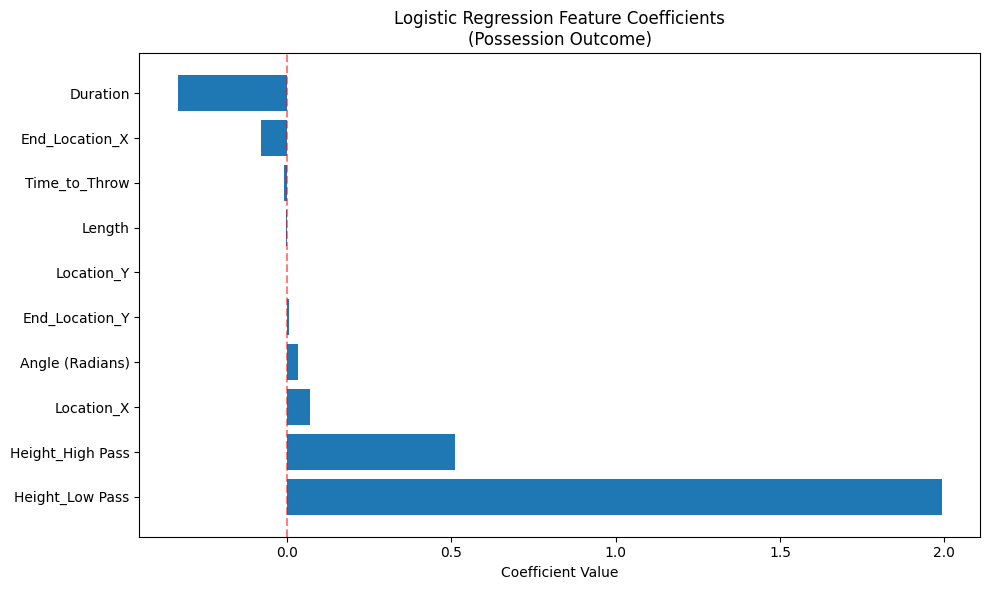

In [147]:
# View feature coefficients (feature importance in logistic regression)
coef_df = pd.DataFrame({
    'Feature': Features,
    'Coefficient': logreg_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Logistic Regression Coefficients:")
print(coef_df)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Coefficients\n(Possession Outcome)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [148]:
# View updated Throws dataframe with probabilities
Throws.head(10)

,Match,Team,Location,Location_X,Location_Y,End_Location,End_Location_X,End_Location_Y,Angle (Radians),Angle (Degrees),Length,Duration,Time_to_Throw,Possession_Time,Third,bin_angle,High_Throw,Outcome,Possession_outcome,Outcome_Binary,Height,Height_High Pass,Height_Low Pass,Attacking Third,Defensive Third,Middle Third,Length_Bin,Prob_Incomplete,Prob_Successful
0,3753972,AFC Bournemouth,"[92.6, 0.1]",92.6,0.1,"[96.3, 13.5]",96.3,13.5,1.301390,74.564,13.901,1.512,13.486,17.401,Attacking Third,Neutral,High Pass,Successful,Successful,1,High Pass,True,False,True,False,False,Short,0.202117,0.797883
1,3753972,Swansea City,"[51.2, 0.1]",51.2,0.1,"[69.4, 8.4]",69.4,8.4,0.427869,24.515,20.003,1.590,22.138,0.000,Middle Third,Aggressive,Low Pass,Incomplete,Incomplete,0,Low Pass,False,True,False,False,True,Long,0.132946,0.867054
2,3753972,AFC Bournemouth,"[31.1, 80.0]",31.1,80.0,"[46.4, 74.3]",46.4,74.3,-0.356620,-20.433,16.327,1.121,12.324,2.318,Defensive Third,Aggressive,High Pass,Successful,Successful,1,High Pass,True,False,False,True,False,Short,0.243630,0.756370
3,3753972,AFC Bournemouth,"[69.8, 0.1]",69.8,0.1,"[83.7, 21.2]",83.7,21.2,0.988282,56.624,25.267,2.210,17.509,19.325,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Long,0.124594,0.875406
4,3753972,AFC Bournemouth,"[77.6, 80.0]",77.6,80.0,"[86.7, 59.8]",86.7,59.8,-1.147531,-65.749,22.155,1.894,9.670,12.159,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Long,0.084801,0.915199
5,3753972,AFC Bournemouth,"[40.2, 0.1]",40.2,0.1,"[50.8, 7.7]",50.8,7.7,0.622032,35.640,13.043,1.018,17.790,1.931,Middle Third,Aggressive,High Pass,Successful,Successful,1,High Pass,True,False,False,False,True,Short,0.206357,0.793643
6,3753972,AFC Bournemouth,"[42.4, 0.1]",42.4,0.1,"[52.5, 5.6]",52.5,5.6,0.498653,28.571,11.500,1.013,16.157,6.796,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Short,0.054129,0.945871
7,3753972,Swansea City,"[63.5, 80.0]",63.5,80.0,"[69.3, 72.2]",69.3,72.2,-0.931410,-53.366,9.720,1.023,15.200,43.468,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Short,0.043557,0.956443
8,3753972,AFC Bournemouth,"[42.9, 80.0]",42.9,80.0,"[50.3, 67.4]",50.3,67.4,-1.039766,-59.574,14.612,0.886,9.436,9.651,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Short,0.039115,0.960885
9,3753972,Swansea City,"[104.2, 80.0]",104.2,80.0,"[105.7, 74.5]",105.7,74.5,-1.304544,-74.745,5.701,0.853,14.724,0.000,Attacking Third,Neutral,Low Pass,Incomplete,Incomplete,0,Low Pass,False,True,True,False,False,Short,0.040690,0.959310


## Create Bins for Graphing Throw Location

In [149]:
# Create Location_Bin column based on Location_X and Location_Y ranges
def _bin_location(row):
    try:
        x = row.get('Location_X', None)
        y = row.get('Location_Y', None)
        
        # If either value is missing, return None
        if pd.isna(x) or pd.isna(y):
            return None
        
        x = float(x)
        y = float(y)
        
        # Determine Y bin (0 or 80)
        # If Y is closer to 0, use y_bin = 0; if closer to 80, use y_bin = 80
        y_bin = 0 if y < 40 else 80
        
        # Determine X bin based on ranges
        if 0 <= x <= 40:
            x_bin = 20
        elif 40 < x <= 80:
            x_bin = 60
        elif 80 < x <= 120:
            x_bin = 100
        else:
            return None  # Outside expected range
        
        return f'[{x_bin}, {y_bin}]'
    
    except Exception:
        return None

# Apply the binning function
Throws['Location_Bin'] = Throws.apply(_bin_location, axis=1)

# Display value counts and sample
print('Location_Bin value counts:')
print(Throws['Location_Bin'].value_counts(dropna=False))
print('\nSample of Location_X, Location_Y, and Location_Bin:')
display(Throws[['Location_X', 'Location_Y', 'Location_Bin']].head(15))

Location_Bin value counts:
Location_Bin
[60, 80]     3741
[60, 0]      3367
[100, 80]    3358
[100, 0]     3062
[20, 0]      1954
[20, 80]     1875
Name: count, dtype: int64

Sample of Location_X, Location_Y, and Location_Bin:


,Location_X,Location_Y,Location_Bin
0,92.6,0.1,"[100, 0]"
1,51.2,0.1,"[60, 0]"
2,31.1,80.0,"[20, 80]"
3,69.8,0.1,"[60, 0]"
4,77.6,80.0,"[60, 80]"
5,40.2,0.1,"[60, 0]"
6,42.4,0.1,"[60, 0]"
7,63.5,80.0,"[60, 80]"
8,42.9,80.0,"[60, 80]"
9,104.2,80.0,"[100, 80]"


In [151]:
# Create End_Location_Bin based on Location_Bin and bin_angle
# Mapping table as provided
mapping = {
    '[20, 80]': {  # RD
        'Aggressive': '[30, 70]',
        'Neutral': '[20, 60]',
        'Safe': '[10, 70]'
    },
    '[60, 80]': {  # RM
        'Aggressive': '[70, 70]',
        'Neutral': '[60, 60]',
        'Safe': '[50, 70]'
    },
    '[100, 80]': {  # RA
        'Aggressive': '[110, 70]',
        'Neutral': '[100, 60]',
        'Safe': '[90, 70]'
    },
    '[20, 0]': {  # LD
        'Aggressive': '[30, 10]',
        'Neutral': '[20, 20]',
        'Safe': '[10, 10]'
    },
    '[60, 0]': {  # LM
        'Aggressive': '[70, 10]',
        'Neutral': '[60, 20]',
        'Safe': '[50, 10]'
    },
    '[100, 0]': {  # LA
        'Aggressive': '[110, 10]',
        'Neutral': '[100, 20]',
        'Safe': '[90, 10]'
    }
}

def _get_end_location_bin(row):
    """Map Location_Bin and bin_angle to End_Location_Bin coordinates."""
    try:
        loc_bin = row.get('Location_Bin', None)
        angle_agg = row.get('bin_angle', None)
        
        if pd.isna(loc_bin) or pd.isna(angle_agg) or loc_bin not in mapping:
            return None
        
        # Get the coordinates for this (Location_Bin, bin_angle) pair
        return mapping[loc_bin].get(angle_agg, None)
    
    except Exception:
        return None

# Apply mapping to create End_Location_Bin
Throws['End_Location_Bin'] = Throws.apply(_get_end_location_bin, axis=1)

# Display results
print('End_Location_Bin value counts:')
print(Throws['End_Location_Bin'].value_counts(dropna=False))
print(f'\nSample of Location_Bin, bin_angle, and End_Location_Bin:')
display(Throws[['Location_Bin', 'bin_angle', 'End_Location_Bin']].head(20))


End_Location_Bin value counts:
End_Location_Bin
[70, 70]     1973
[70, 10]     1647
[30, 10]     1467
[30, 70]     1368
[100, 60]    1258
[90, 70]     1145
[90, 10]     1113
[50, 10]     1088
[100, 20]    1056
[50, 70]     1019
[110, 70]     955
[110, 10]     893
[60, 60]      749
[60, 20]      632
[20, 60]      271
[10, 10]      267
[10, 70]      236
[20, 20]      220
Name: count, dtype: int64

Sample of Location_Bin, bin_angle, and End_Location_Bin:


,Location_Bin,bin_angle,End_Location_Bin
0,"[100, 0]",Neutral,"[100, 20]"
1,"[60, 0]",Aggressive,"[70, 10]"
2,"[20, 80]",Aggressive,"[30, 70]"
3,"[60, 0]",Aggressive,"[70, 10]"
4,"[60, 80]",Aggressive,"[70, 70]"
5,"[60, 0]",Aggressive,"[70, 10]"
6,"[60, 0]",Aggressive,"[70, 10]"
7,"[60, 80]",Aggressive,"[70, 70]"
8,"[60, 80]",Aggressive,"[70, 70]"
9,"[100, 80]",Neutral,"[100, 60]"


In [185]:
# Create End_Location_Len_Bin mapping with Location_Bin, bin_angle, and Length_Bin hierarchy
mapping_len_bin = {
    '[20, 80]': {  # RD
        'Aggressive': {'Short': '[30,70]', 'Long': '[35,65]'},
        'Neutral': {'Short': '[20,70]', 'Long': '[20,60]'},
        'Safe': {'Short': '[10,70]', 'Long': '[5,65]'}
    },
    '[60, 80]': {  # RM
        'Aggressive': {'Short': '[70,70]', 'Long': '[75,65]'},
        'Neutral': {'Short': '[60,70]', 'Long': '[60,60]'},
        'Safe': {'Short': '[50,70]', 'Long': '[45,65]'}
    },
    '[100, 80]': {  # RA
        'Aggressive': {'Short': '[110,70]', 'Long': '[115,65]'},
        'Neutral': {'Short': '[100,70]', 'Long': '[100,60]'},
        'Safe': {'Short': '[90,70]', 'Long': '[85,65]'}
    },
    '[20, 0]': {  # LD
        'Aggressive': {'Short': '[30,10]', 'Long': '[35,15]'},
        'Neutral': {'Short': '[20,10]', 'Long': '[20,20]'},
        'Safe': {'Short': '[10,10]', 'Long': '[5,15]'}
    },
    '[60, 0]': {  # LM
        'Aggressive': {'Short': '[70,10]', 'Long': '[75,15]'},
        'Neutral': {'Short': '[60,10]', 'Long': '[60,20]'},
        'Safe': {'Short': '[50,10]', 'Long': '[45,15]'}
    },
    '[100, 0]': {  # LA
        'Aggressive': {'Short': '[110,10]', 'Long': '[115,15]'},
        'Neutral': {'Short': '[100,10]', 'Long': '[100,20]'},
        'Safe': {'Short': '[90,10]', 'Long': '[85,15]'}
    }
}

# Function to get End_Location_Len_Bin based on hierarchy
def get_end_location_len_bin(row):
    location_bin = row['Location_Bin']
    angle_bin = row['bin_angle']
    length_bin = row['Length_Bin']
    
    try:
        return mapping_len_bin[location_bin][angle_bin][length_bin]
    except (KeyError, TypeError):
        return None

# Apply mapping to create End_Location_Len_Bin column
Throws['End_Location_Len_Bin'] = Throws.apply(get_end_location_len_bin, axis=1)

# Display sample results
print("End_Location_Len_Bin column created successfully!")
print("\nSample of new column:")
print(Throws[['Location_Bin', 'bin_angle', 'Length_Bin', 'End_Location_Len_Bin']].head(10))
print(f"\nTotal rows with End_Location_Len_Bin: {Throws['End_Location_Len_Bin'].notna().sum()}")
print(f"Total rows with null End_Location_Len_Bin: {Throws['End_Location_Len_Bin'].isna().sum()}")

End_Location_Len_Bin column created successfully!

Sample of new column:
  Location_Bin   bin_angle Length_Bin End_Location_Len_Bin
0     [100, 0]     Neutral      Short             [100,10]
1      [60, 0]  Aggressive       Long              [75,15]
2     [20, 80]  Aggressive      Short              [30,70]
3      [60, 0]  Aggressive       Long              [75,15]
4     [60, 80]  Aggressive       Long              [75,65]
5      [60, 0]  Aggressive      Short              [70,10]
6      [60, 0]  Aggressive      Short              [70,10]
7     [60, 80]  Aggressive      Short              [70,70]
8     [60, 80]  Aggressive      Short              [70,70]
9    [100, 80]     Neutral      Short             [100,70]

Total rows with End_Location_Len_Bin: 17357
Total rows with null End_Location_Len_Bin: 0


In [183]:
Throws.head(5)

,Match,Team,Location,Location_X,Location_Y,End_Location,End_Location_X,End_Location_Y,Angle (Radians),Angle (Degrees),Length,Duration,Time_to_Throw,Possession_Time,Third,bin_angle,High_Throw,Outcome,Possession_outcome,Outcome_Binary,Height,Height_High Pass,Height_Low Pass,Attacking Third,Defensive Third,Middle Third,Length_Bin,Prob_Incomplete,Prob_Successful,Location_Bin,End_Location_Bin
0,3753972,AFC Bournemouth,"[92.6, 0.1]",92.6,0.1,"[96.3, 13.5]",96.3,13.5,1.301390,74.564,13.901,1.512,13.486,17.401,Attacking Third,Neutral,High Pass,Successful,Successful,1,High Pass,True,False,True,False,False,Short,0.202117,0.797883,"[100, 0]","[100, 20]"
1,3753972,Swansea City,"[51.2, 0.1]",51.2,0.1,"[69.4, 8.4]",69.4,8.4,0.427869,24.515,20.003,1.590,22.138,0.000,Middle Third,Aggressive,Low Pass,Incomplete,Incomplete,0,Low Pass,False,True,False,False,True,Long,0.132946,0.867054,"[60, 0]","[70, 10]"
2,3753972,AFC Bournemouth,"[31.1, 80.0]",31.1,80.0,"[46.4, 74.3]",46.4,74.3,-0.356620,-20.433,16.327,1.121,12.324,2.318,Defensive Third,Aggressive,High Pass,Successful,Successful,1,High Pass,True,False,False,True,False,Short,0.243630,0.756370,"[20, 80]","[30, 70]"
3,3753972,AFC Bournemouth,"[69.8, 0.1]",69.8,0.1,"[83.7, 21.2]",83.7,21.2,0.988282,56.624,25.267,2.210,17.509,19.325,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Long,0.124594,0.875406,"[60, 0]","[70, 10]"
4,3753972,AFC Bournemouth,"[77.6, 80.0]",77.6,80.0,"[86.7, 59.8]",86.7,59.8,-1.147531,-65.749,22.155,1.894,9.670,12.159,Middle Third,Aggressive,Low Pass,Successful,Successful,1,Low Pass,False,True,False,False,True,Long,0.084801,0.915199,"[60, 80]","[70, 70]"


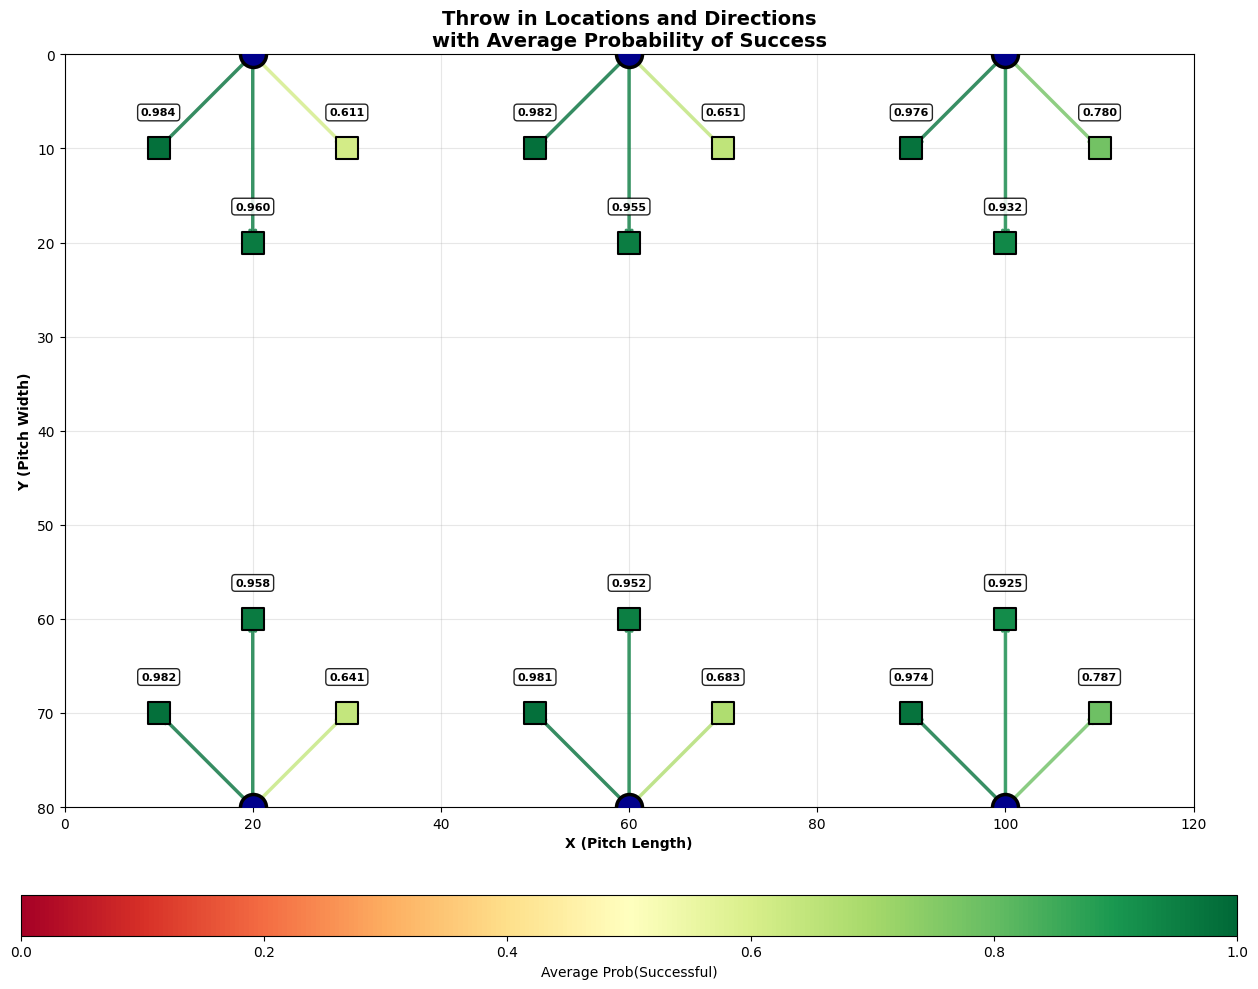


Total throws plotted: 17357


In [182]:
# Plot Location_Bin and End_Location_Bin with average Prob_Successful labels
import matplotlib.pyplot as plt
import ast
import pandas as pd

# Parse coordinate strings to (x, y) tuples
def parse_coords(coord_str):
    try:
        coords = ast.literal_eval(coord_str)
        return tuple(coords) if isinstance(coords, list) else coords
    except:
        return None

# Filter rows with complete data
plot_data = Throws[['Location_Bin', 'End_Location_Bin', 'Prob_Successful']].copy()
plot_data = plot_data.dropna(subset=['Location_Bin', 'End_Location_Bin', 'Prob_Successful'])

# Remove any rows where parsing would fail
plot_data = plot_data[plot_data['Location_Bin'].notna() & plot_data['End_Location_Bin'].notna()]

if plot_data.empty:
    print("No valid data to plot")
else:
    # Group by (Location_Bin, End_Location_Bin) and calculate average Prob_Successful
    summary = plot_data.groupby(['Location_Bin', 'End_Location_Bin']).agg({
        'Prob_Successful': ['mean', 'count']
    }).reset_index()
    summary.columns = ['Location_Bin', 'End_Location_Bin', 'Avg_Prob_Successful', 'Count']
    
    # Parse coordinates for visualization
    summary['Start_Coords'] = summary['Location_Bin'].apply(parse_coords)
    summary['End_Coords'] = summary['End_Location_Bin'].apply(parse_coords)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Get unique start locations for labeling
    unique_starts = summary.groupby('Location_Bin')['Start_Coords'].first()
    
    # Plot each flow (start → end) with arrow colored by probability
    for idx, row in summary.iterrows():
        start_coords = row['Start_Coords']
        end_coords = row['End_Coords']
        avg_prob = row['Avg_Prob_Successful']
        
        if start_coords is None or end_coords is None:
            continue
        
        # Draw arrow from start to end with color based on probability
        # Higher probability = greener, lower = redder
        color = plt.cm.RdYlGn(avg_prob)
        
        ax.annotate('', xy=end_coords, xytext=start_coords,
                   arrowprops=dict(arrowstyle='->', lw=2.5, color=color, alpha=0.8))
        
        # Plot end location marker
        ax.scatter(end_coords[0], end_coords[1], s=250, c=[color], marker='s', 
                  edgecolor='black', linewidth=1.5, zorder=4)
        
        # Add probability text near the end location
        ax.text(end_coords[0], end_coords[1]-3.5, f'{avg_prob:.3f}', 
               ha='center', fontsize=8, fontweight='bold', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.85))
    
    # Plot start locations (without labels)
    for loc_bin, start_coords in unique_starts.items():
        if start_coords is not None:
            ax.scatter(start_coords[0], start_coords[1], s=350, c='darkblue', marker='o', 
                      edgecolor='black', linewidth=2.5, zorder=5)
    
    # Set pitch bounds and labels (restricted to actual pitch)
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_aspect('equal')
    ax.set_xlabel('X (Pitch Length)',fontweight='bold')
    ax.set_ylabel('Y (Pitch Width)', fontweight='bold')
    ax.set_title('Throw in Locations and Directions\nwith Average Probability of Success', 
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)   

    # Add colorbar for probability scale (below the graph, smaller size)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, fraction=0.046, 
                       label='Average Prob(Successful)', aspect=30)
    
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()
    
    print("\n" + "="*80)
    print(f"Total throws plotted: {len(plot_data)}")

In [157]:
print(f"Summary of Location_Bin → End_Location_Bin with Average Probability:")
print("="*80)
for idx, row in summary.iterrows():
    print(f"Location {row['Location_Bin']} → End {row['End_Location_Bin']}: "
            f"Avg Prob = {row['Avg_Prob_Successful']:.4f} (n={int(row['Count'])})")

Summary of Location_Bin → End_Location_Bin with Average Probability:
Location [100, 0] → End [100, 20]: Avg Prob = 0.9319 (n=1056)
Location [100, 0] → End [110, 10]: Avg Prob = 0.7798 (n=893)
Location [100, 0] → End [90, 10]: Avg Prob = 0.9756 (n=1113)
Location [100, 80] → End [100, 60]: Avg Prob = 0.9253 (n=1258)
Location [100, 80] → End [110, 70]: Avg Prob = 0.7866 (n=955)
Location [100, 80] → End [90, 70]: Avg Prob = 0.9740 (n=1145)
Location [20, 0] → End [10, 10]: Avg Prob = 0.9842 (n=267)
Location [20, 0] → End [20, 20]: Avg Prob = 0.9596 (n=220)
Location [20, 0] → End [30, 10]: Avg Prob = 0.6111 (n=1467)
Location [20, 80] → End [10, 70]: Avg Prob = 0.9823 (n=236)
Location [20, 80] → End [20, 60]: Avg Prob = 0.9583 (n=271)
Location [20, 80] → End [30, 70]: Avg Prob = 0.6407 (n=1368)
Location [60, 0] → End [50, 10]: Avg Prob = 0.9821 (n=1088)
Location [60, 0] → End [60, 20]: Avg Prob = 0.9554 (n=632)
Location [60, 0] → End [70, 10]: Avg Prob = 0.6515 (n=1647)
Location [60, 80] → En

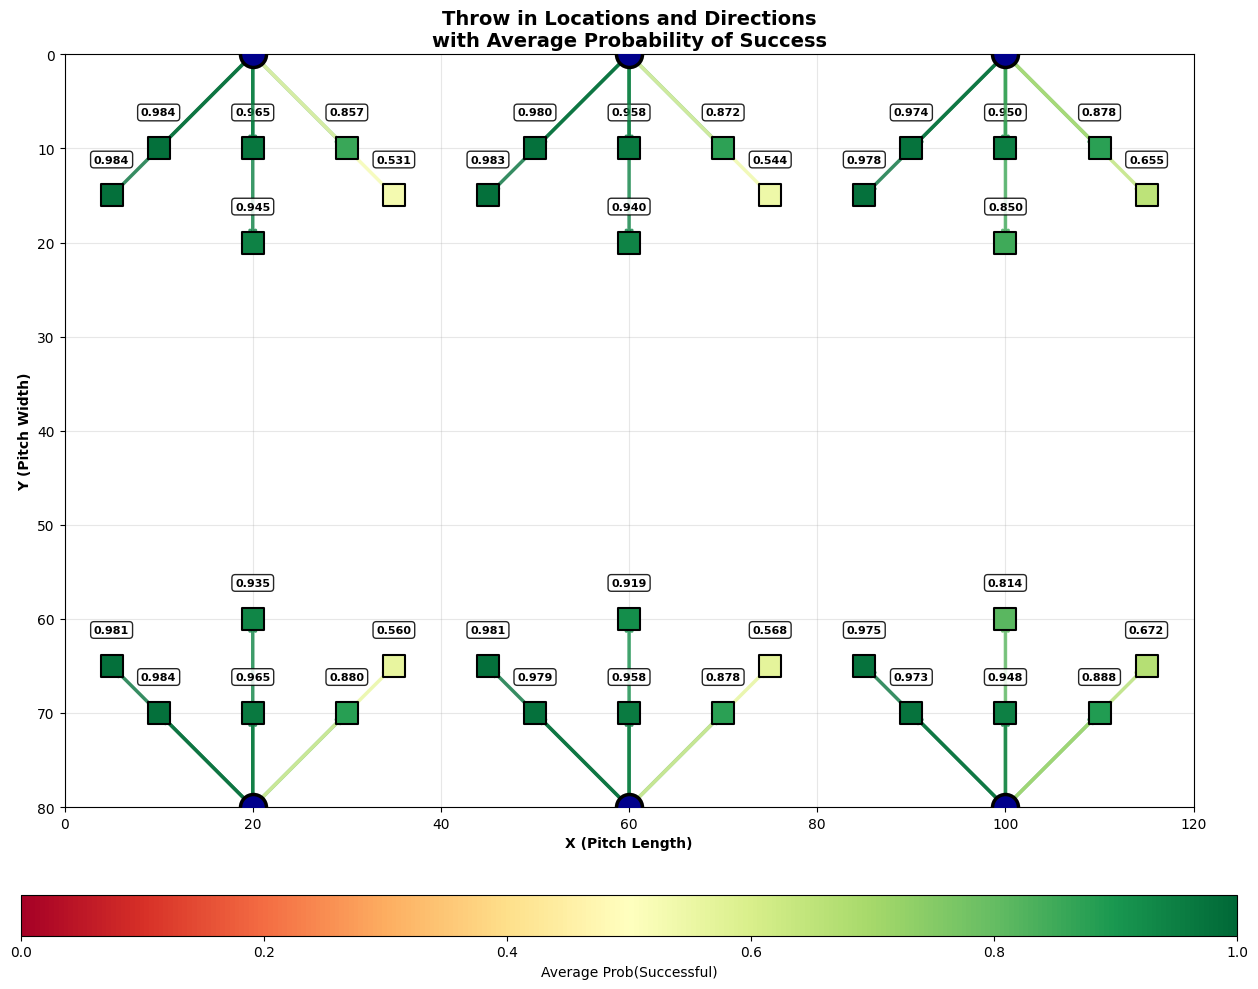


Total throws plotted: 17357


In [187]:
# Plot Location_Bin and End_Location_Bin with average Prob_Successful labels
import matplotlib.pyplot as plt
import ast
import pandas as pd

# Parse coordinate strings to (x, y) tuples
def parse_coords(coord_str):
    try:
        coords = ast.literal_eval(coord_str)
        return tuple(coords) if isinstance(coords, list) else coords
    except:
        return None

# Filter rows with complete data
plot_data = Throws[['Location_Bin', 'End_Location_Len_Bin', 'Prob_Successful']].copy()
plot_data = plot_data.dropna(subset=['Location_Bin', 'End_Location_Len_Bin', 'Prob_Successful'])

# Remove any rows where parsing would fail
plot_data = plot_data[plot_data['Location_Bin'].notna() & plot_data['End_Location_Len_Bin'].notna()]

if plot_data.empty:
    print("No valid data to plot")
else:
    # Group by (Location_Bin, End_Location_Len_Bin) and calculate average Prob_Successful
    summary = plot_data.groupby(['Location_Bin', 'End_Location_Len_Bin']).agg({
        'Prob_Successful': ['mean', 'count']
    }).reset_index()
    summary.columns = ['Location_Bin', 'End_Location_Len_Bin', 'Avg_Prob_Successful', 'Count']

    # Parse coordinates for visualization
    summary['Start_Coords'] = summary['Location_Bin'].apply(parse_coords)
    summary['End_Coords'] = summary['End_Location_Len_Bin'].apply(parse_coords)

    # Create visualization
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Get unique start locations for labeling
    unique_starts = summary.groupby('Location_Bin')['Start_Coords'].first()
    
    # Plot each flow (start → end) with arrow colored by probability
    for idx, row in summary.iterrows():
        start_coords = row['Start_Coords']
        end_coords = row['End_Coords']
        avg_prob = row['Avg_Prob_Successful']
        
        if start_coords is None or end_coords is None:
            continue
        
        # Draw arrow from start to end with color based on probability
        # Higher probability = greener, lower = redder
        color = plt.cm.RdYlGn(avg_prob)
        
        ax.annotate('', xy=end_coords, xytext=start_coords,
                   arrowprops=dict(arrowstyle='->', lw=2.5, color=color, alpha=0.8))
        
        # Plot end location marker
        ax.scatter(end_coords[0], end_coords[1], s=250, c=[color], marker='s', 
                  edgecolor='black', linewidth=1.5, zorder=4)
        
        # Add probability text near the end location
        ax.text(end_coords[0], end_coords[1]-3.5, f'{avg_prob:.3f}', 
               ha='center', fontsize=8, fontweight='bold', 
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.85))
    
    # Plot start locations (without labels)
    for loc_bin, start_coords in unique_starts.items():
        if start_coords is not None:
            ax.scatter(start_coords[0], start_coords[1], s=350, c='darkblue', marker='o', 
                      edgecolor='black', linewidth=2.5, zorder=5)
    
    # Set pitch bounds and labels (restricted to actual pitch)
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_aspect('equal')
    ax.set_xlabel('X (Pitch Length)',fontweight='bold')
    ax.set_ylabel('Y (Pitch Width)', fontweight='bold')
    ax.set_title('Throw in Locations and Directions\nwith Average Probability of Success', 
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)   

    # Add colorbar for probability scale (below the graph, smaller size)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn, norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1, fraction=0.046, 
                       label='Average Prob(Successful)', aspect=30)
    
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()
    
    print("\n" + "="*80)
    print(f"Total throws plotted: {len(plot_data)}")